**DRIVE MOUNT**

In [ ]:
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-06 20:42:23 GMT


**LIBRARY IMPORTS**

In [ ]:
from numpy.random import seed

# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing Basic Libaries for Data Load and Image Movement
import os
import pandas as pd
import numpy as np
import itertools
import shutil

#Tensorflow libraries
import tensorflow
tensorflow.random.set_seed(101)

#libraries to build neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers

#Model Libraries:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet  import preprocess_input

#Split and Importing evaluation libraries
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#Plotting Graphs:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DIRECTORIES CREATION**

In [ ]:
# Creating new directory for file movement:
skin_dense_base_dir = 'skin_dense_base_dir'
os.mkdir(skin_dense_base_dir)

In [ ]:
# Generate a pathway leading to the 'skin_dense_base_dir' to which we will append the names of the new folders
# Training Directory creation
train_dir = os.path.join(skin_dense_base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation Directory creation
val_dir = os.path.join(skin_dense_base_dir, 'val_dir')
os.mkdir(val_dir)

# Test Directory creation
test_dir = os.path.join(skin_dense_base_dir, 'test_dir')
os.mkdir(test_dir)

In [ ]:
# Creation of new folders inside Training Directory
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Validation Directory
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Test Directory
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)

**DATA LOAD AND ANALYSIS**

In [ ]:
#Read metadata information of HAM10000 dataset
df_data = pd.read_csv('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/HAM10000_metadata')

df_data.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern

In [ ]:
df_data.shape

(10015, 8)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
#HAM1000 attributes basic analysis
print('unique lesion_id records:' ,df_data.lesion_id.nunique())
print('unique image_id records:' ,df_data.image_id.nunique())
print('unique dx records:' ,df_data.dx.nunique())
print('unique dx_type records:' ,df_data.dx_type.nunique())
print('unique  age records:' ,df_data.age.nunique())
print('unique  sex records:' ,df_data.sex.nunique())
print('unique  localization records:' ,df_data.localization.nunique())
print('unique   dataset records:' ,df_data. dataset.nunique())

unique lesion_id records: 7470
unique image_id records: 10015
unique dx records: 7
unique dx_type records: 4
unique  age records: 18
unique  sex records: 3
unique  localization records: 15
unique   dataset records: 4


In [ ]:
#HAM10000 dataset value counts
column_list=['dx','dx_type','age','sex','localization','dataset']
for column in column_list:
    print(f"Value counts for '{column}':")
    print(df_data[column].value_counts())
    print("\n")

Value counts for 'dx':
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


Value counts for 'dx_type':
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


Value counts for 'age':
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


Value counts for 'sex':
male       5406
female     4552
unknown      57
Name: sex, dtype: int64


Value counts for 'localization':
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  

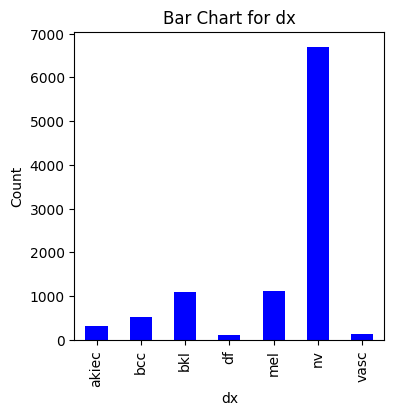

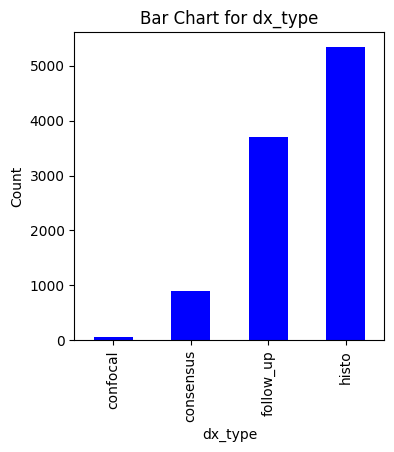

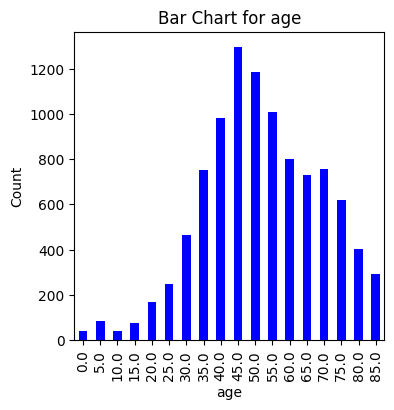

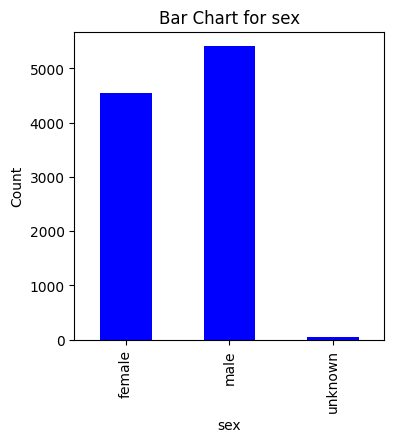

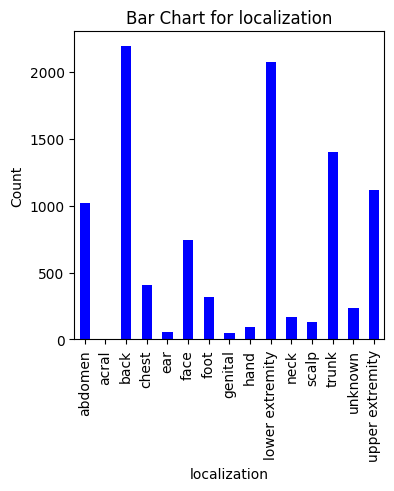

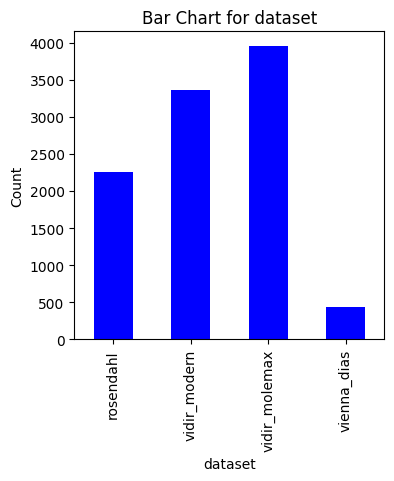

In [ ]:
# HAM10000 dataset visualization of variables
for column in column_list:
    plt.figure(figsize=(4, 4))
    df_data[column].value_counts().sort_index().plot(kind='bar', color='blue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Sorting the dataset based on Lesion_Id
df_data = df_data.sort_values(by='lesion_id')

In [ ]:
# Train , Test and Validation Split Ratio
train_ratio = 0.7  # 70% of the data for training
test_ratio = 0.15  # 15% of the data for testing
val_ratio = 0.15   # 15% of the data for validation

In [ ]:
# Split the DataFrame into train, test, and validation dataframes
df_train, test_val_df = train_test_split(df_data, test_size=(test_ratio + val_ratio), random_state=42)
df_test, df_val = train_test_split(test_val_df, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)


In [ ]:
#Length of Data Frame
print('Length of df_train:',len(df_train))
print('Length of df_val:',len(df_val))
print('Length of df_test:',len(df_test))

Length of df_train: 7010
Length of df_val: 1503
Length of df_test: 1502


In [ ]:
#Training set unique class values
df_train['dx'].value_counts()

nv       4647
bkl       799
mel       790
bcc       362
akiec     228
vasc      100
df         84
Name: dx, dtype: int64

In [ ]:
#Validation set unique class values
df_val['dx'].value_counts()

nv       1015
mel       182
bkl       151
bcc        70
akiec      54
vasc       18
df         13
Name: dx, dtype: int64

In [ ]:
#Test set unique class values
df_test['dx'].value_counts()

nv       1043
bkl       149
mel       141
bcc        82
akiec      45
vasc       24
df         18
Name: dx, dtype: int64

**IMAGES COPY FROM SOURCE TO DESTINATION**

In [ ]:
# Get a list of images from HAM folder in Google Drive
folder = os.listdir('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES')

# Get a list of train ,test and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

In [ ]:
#Moving the images from google dir to train_dir
for image in train_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]


    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to val_dir
for image in val_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to test_dir
for image in test_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(test_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/train_dir/df')))

nv: 4647
mel: 790
bkl: 799
bcc: 362
akiec: 228
vasc: 100
df: 84


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_dense_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


In [ ]:
#Copy the train images into skin_dense_aug_dir
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:

    # We are creating temporary directories
    # create a aug dir
    skin_dense_aug_dir = 'skin_dense_aug_dir'
    os.mkdir(skin_dense_aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(skin_dense_aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('skin_dense_base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('skin_dense_base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = skin_dense_aug_dir
    save_path = 'skin_dense_base_dir/train_dir/' + img_class

    # Create a data generator skin ui
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)

    num_aug_images_wanted = 4500 # total number of images  in each class

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('skin_dense_aug_dir')

Found 790 images belonging to 1 classes.
Found 799 images belonging to 1 classes.
Found 362 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/train_dir/df')))

nv: 4647
mel: 4500
bkl: 4545
bcc: 4132
akiec: 4154
vasc: 4500
df: 3830


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_dense_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


**IMAGE GENERATOR STEPS**

In [ ]:
#Prepare for Generator steps

train_path = 'skin_dense_base_dir/train_dir'
valid_path = 'skin_dense_base_dir/val_dir'
test_path='skin_dense_base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [ ]:
#Data Generator Preprocessing and creating train,test and validation batches
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.densenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,class_mode='categorical')

test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=test_batch_size,
                                            shuffle=False,class_mode='categorical')

Found 30308 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1502 images belonging to 7 classes.


**MODEL BUILDING ANS EVALUATION**

**#Iteration 1:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 77s 82ms/step - loss: 1.0795 - accuracy: 0.5979 - val_loss: 0.7400 - val_accuracy: 0.7312
Epoch 2/30
701/701 [==============================] - 56s 79ms/step - loss: 0.8131 - accuracy: 0.7011 - val_loss: 0.6707 - val_accuracy: 0.7512
Epoch 3/30
701/701 [==============================] - 54s 76ms/step - loss: 0.7160 - accuracy: 0.7359 - val_loss: 0.6468 - val_accuracy: 0.7618
Epoch 4/30
701/701 [==============================] - 53s 76ms/step - loss: 0.6581 - accuracy: 0.7572 - val_loss: 0.6375 - val_accuracy: 0.7678
Epoch 5/30
701/701 [==============================] - 53s 76ms/step - loss: 0.6248 - accuracy: 0.7732 - val_loss: 0.6349 - val_accuracy: 0.7738
Epoch 6/30
701/701 [==============================] - 53s 76ms/step - loss: 0.5971 - accuracy: 0.7857 - val_loss: 0.6102 - val_accuracy: 0.7858
Epoch 7/30
701/701 [==============================] - 51s 73ms/step - loss: 0.5578 - accuracy: 0.7949 - val_loss: 0.6471 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 15s 83ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 17   7  11   1   3   6   0]
 [  3  50  14   1   1  13   0]
 [  1   9  90   1  16  32   0]
 [  0   1   0   9   1   7   0]
 [  7   6  21   0  45  62   0]
 [  5  11  38   1  28 959   1]
 [  0   1   0   0   0   4  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.52      0.38      0.44        45
         bcc       0.59      0.61      0.60        82
         bkl       0.52      0.60      0.56       149
          df       0.69      0.50      0.58        18
         mel       0.48      0.32      0.38       141
          nv       0.89      0.92      0.90      1043
        vasc       0.95      0.79      0.86        24

    accuracy                           0.79      1502
   macro avg       0.66      0.59      0.62      1502
weighted avg       0.78      0.79      0.78      1502



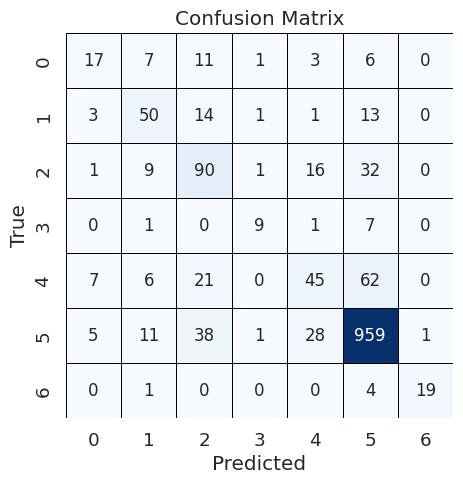

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

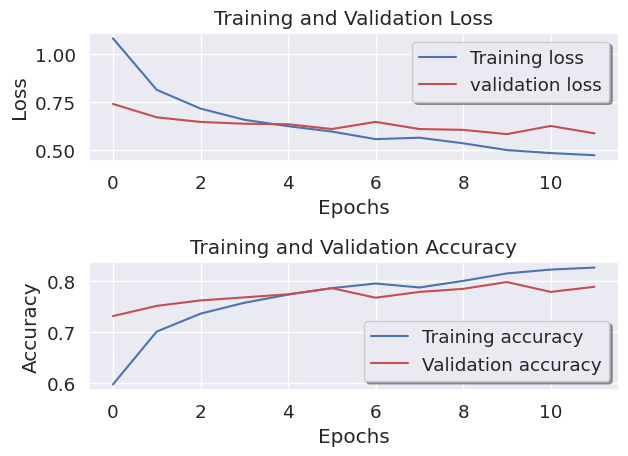

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.5687 - accuracy: 0.7916
 validation loss and accuracy are [0.5686813592910767, 0.7916111946105957]
0.5686813592910767 Test accuracy: 0.7916


In [ ]:
column_names = ['Train_Loss', 'Train_Accuracy', 'Val_Loss','Val_Accuracy','Test_Loss','Test_Accuracy']
df_model = pd.DataFrame(columns=column_names)

In [ ]:
df_model

Empty DataFrame
Columns: [Train_Loss, Train_Accuracy, Val_Loss, Val_Accuracy, Test_Loss, Test_Accuracy]
Index: []

In [ ]:
history.history['accuracy'][-1]

0.8259629011154175

In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
print(train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy)

0.4745643138885498 0.8259629011154175 0.5876877307891846 0.7884231805801392 0.5686813592910767 0.7916111946105957


In [ ]:
# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)

In [ ]:
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   

   Test_Accuracy  
0       0.791611

**#Iteration 2:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.2))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 73s 90ms/step - loss: 1.2727 - accuracy: 0.5568 - val_loss: 0.6797 - val_accuracy: 0.7465
Epoch 2/30
701/701 [==============================] - 63s 90ms/step - loss: 0.8793 - accuracy: 0.6675 - val_loss: 0.6455 - val_accuracy: 0.7638
Epoch 3/30
701/701 [==============================] - 63s 89ms/step - loss: 0.7676 - accuracy: 0.7087 - val_loss: 0.6109 - val_accuracy: 0.7718
Epoch 4/30
701/701 [==============================] - 63s 89ms/step - loss: 0.6998 - accuracy: 0.7400 - val_loss: 0.6388 - val_accuracy: 0.7758
Epoch 5/30
701/701 [==============================] - 57s 82ms/step - loss: 0.6461 - accuracy: 0.7595 - val_loss: 0.6368 - val_accuracy: 0.7605
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 19   6  10   0   2   8   0]
 [  5  34  13   3   6  17   4]
 [  6   4  70   2  21  46   0]
 [  1   1   4   2   1   8   1]
 [  5   2  13   0  44  76   1]
 [  1   4  18   2  35 980   3]
 [  0   0   0   0   0   1  23]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.51      0.42      0.46        45
         bcc       0.67      0.41      0.51        82
         bkl       0.55      0.47      0.51       149
          df       0.22      0.11      0.15        18
         mel       0.40      0.31      0.35       141
          nv       0.86      0.94      0.90      1043
        vasc       0.72      0.96      0.82        24

    accuracy                           0.78      1502
   macro avg       0.56      0.52      0.53      1502
weighted avg       0.76      0.78      0.76      1502



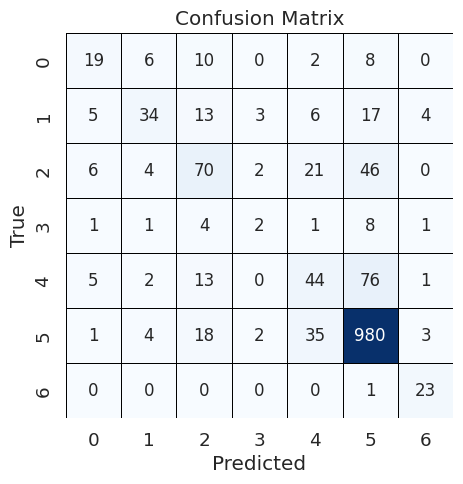

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

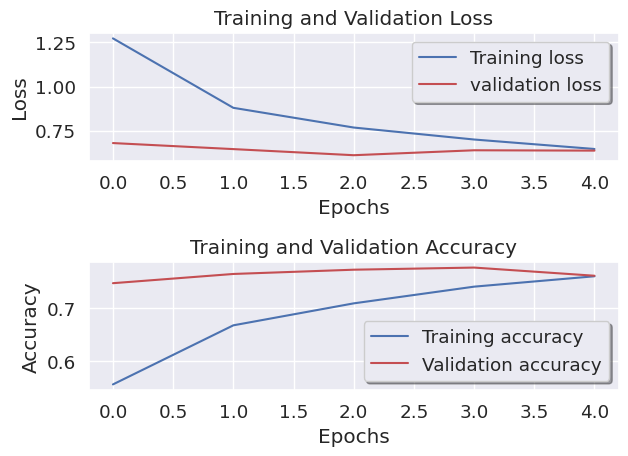

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.6899 - accuracy: 0.7630
 validation loss and accuracy are [0.6898584365844727, 0.7629826664924622]
0.6898584365844727 Test accuracy: 0.7630


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.64613        0.759486  0.636813      0.760479   0.689858   

   Test_Accuracy  
0       0.762983

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   

   Test_Accuracy  
0       0.791611  
1       0.762983

**#Iteration 3:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 74s 91ms/step - loss: 1.5308 - accuracy: 0.4927 - val_loss: 0.8481 - val_accuracy: 0.7212
Epoch 2/30
701/701 [==============================] - 63s 90ms/step - loss: 1.0898 - accuracy: 0.5936 - val_loss: 0.7055 - val_accuracy: 0.7425
Epoch 3/30
701/701 [==============================] - 58s 82ms/step - loss: 0.9883 - accuracy: 0.6213 - val_loss: 0.6845 - val_accuracy: 0.7405
Epoch 4/30
701/701 [==============================] - 62s 89ms/step - loss: 0.9450 - accuracy: 0.6387 - val_loss: 0.7115 - val_accuracy: 0.7452
Epoch 5/30
701/701 [==============================] - 63s 90ms/step - loss: 0.8810 - accuracy: 0.6611 - val_loss: 0.6663 - val_accuracy: 0.7545
Epoch 6/30
701/701 [==============================] - 63s 90ms/step - loss: 0.8543 - accuracy: 0.6676 - val_loss: 0.6445 - val_accuracy: 0.7591
Epoch 7/30
701/701 [==============================] - 63s 90ms/step - loss: 0.8141 - accuracy: 0.6932 - val_loss: 0.6300 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 14  15   5   0   4   7   0]
 [  1  47  10   0   9  13   2]
 [  9   8  48   1  33  49   1]
 [  1   1   1   6   2   7   0]
 [  5   4   9   1  63  57   2]
 [  2  10  12   0  51 965   3]
 [  0   0   0   0   2   0  22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.44      0.31      0.36        45
         bcc       0.55      0.57      0.56        82
         bkl       0.56      0.32      0.41       149
          df       0.75      0.33      0.46        18
         mel       0.38      0.45      0.41       141
          nv       0.88      0.93      0.90      1043
        vasc       0.73      0.92      0.81        24

    accuracy                           0.78      1502
   macro avg       0.61      0.55      0.56      1502
weighted avg       0.77      0.78      0.77      1502



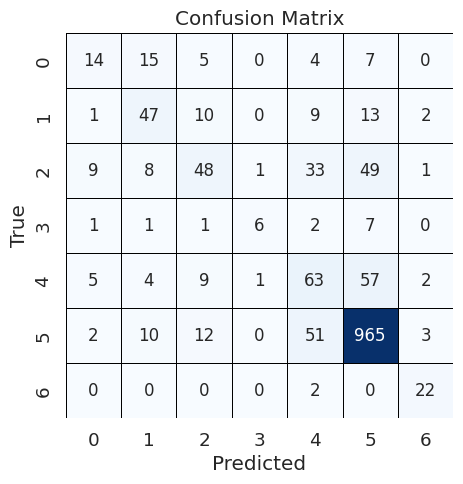

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

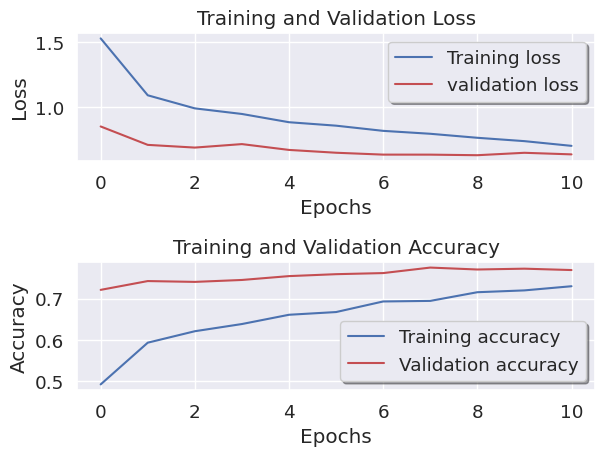

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6117 - accuracy: 0.7716
 validation loss and accuracy are [0.6116557121276855, 0.7716377973556519]
0.6116557121276855 Test accuracy: 0.7716


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.697856        0.730023  0.631864      0.769128   0.611656   

   Test_Accuracy  
0       0.771638

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638

**#Iteration 4:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 65s 79ms/step - loss: 1.0907 - accuracy: 0.5884 - val_loss: 0.7304 - val_accuracy: 0.7226
Epoch 2/30
701/701 [==============================] - 53s 76ms/step - loss: 0.8077 - accuracy: 0.6922 - val_loss: 0.6595 - val_accuracy: 0.7498
Epoch 3/30
701/701 [==============================] - 54s 77ms/step - loss: 0.7398 - accuracy: 0.7213 - val_loss: 0.6520 - val_accuracy: 0.7625
Epoch 4/30
701/701 [==============================] - 52s 74ms/step - loss: 0.6821 - accuracy: 0.7435 - val_loss: 0.6454 - val_accuracy: 0.7585
Epoch 5/30
701/701 [==============================] - 54s 76ms/step - loss: 0.6308 - accuracy: 0.7656 - val_loss: 0.6281 - val_accuracy: 0.7685
Epoch 6/30
701/701 [==============================] - 54s 77ms/step - loss: 0.5803 - accuracy: 0.7829 - val_loss: 0.6001 - val_accuracy: 0.7818
Epoch 7/30
701/701 [==============================] - 54s 77ms/step - loss: 0.5645 - accuracy: 0.7907 - val_loss: 0.6145 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 69ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 20   4   5   0   6  10   0]
 [  6  34   9   1   8  23   1]
 [  4   2  63   1  33  46   0]
 [  0   1   0   5   2  10   0]
 [  9   4  10   0  60  58   0]
 [  5   7  21   0  49 961   0]
 [  0   0   0   0   0   8  16]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.45      0.44      0.45        45
         bcc       0.65      0.41      0.51        82
         bkl       0.58      0.42      0.49       149
          df       0.71      0.28      0.40        18
         mel       0.38      0.43      0.40       141
          nv       0.86      0.92      0.89      1043
        vasc       0.94      0.67      0.78        24

    accuracy                           0.77      1502
   macro avg       0.66      0.51      0.56      1502
weighted avg       0.76      0.77      0.76      1502



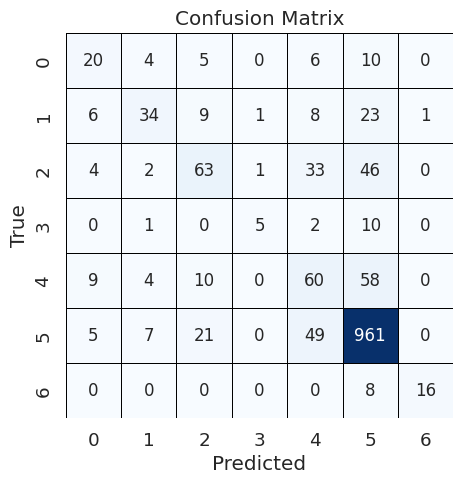

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

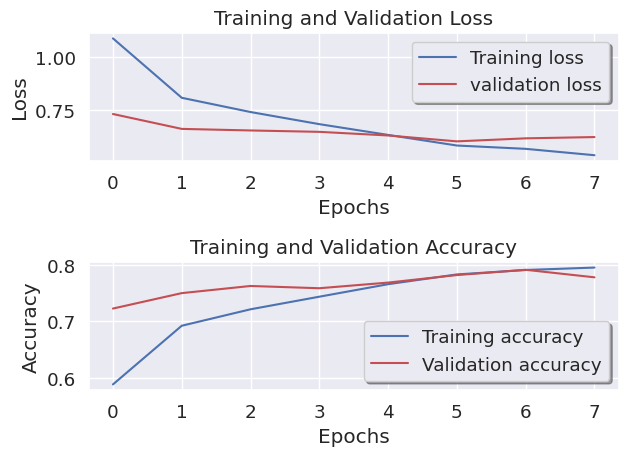

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6202 - accuracy: 0.7710
 validation loss and accuracy are [0.6202328205108643, 0.7709720134735107]
0.6202328205108643 Test accuracy: 0.7710


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.534129        0.795007  0.620574      0.777778   0.620233   

   Test_Accuracy  
0       0.770972

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972

**#Iteration 5:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 253s 223ms/step - loss: 0.8051 - accuracy: 0.7028 - val_loss: 0.5715 - val_accuracy: 0.7864
Epoch 2/30
701/701 [==============================] - 152s 217ms/step - loss: 0.5163 - accuracy: 0.8081 - val_loss: 0.5891 - val_accuracy: 0.7984
Epoch 3/30
701/701 [==============================] - 154s 219ms/step - loss: 0.4122 - accuracy: 0.8449 - val_loss: 0.5908 - val_accuracy: 0.8084
Epoch 3: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 75ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  26    8    5    1    0    5    0]
 [   8   50    3    1    0   19    1]
 [   7    3   83    0    6   50    0]
 [   0    1    1    7    0    9    0]
 [   0    5   15    1   26   94    0]
 [   3    5   17    2   14 1001    1]
 [   0    0    0    0    0    2   22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.59      0.58      0.58        45
         bcc       0.69      0.61      0.65        82
         bkl       0.67      0.56      0.61       149
          df       0.58      0.39      0.47        18
         mel       0.57      0.18      0.28       141
          nv       0.85      0.96      0.90      1043
        vasc       0.92      0.92      0.92        24

    accuracy                           0.81      1502
   macro avg       0.70      0.60      0.63      1502
weighted avg       0.79      0.81      0.78      1502



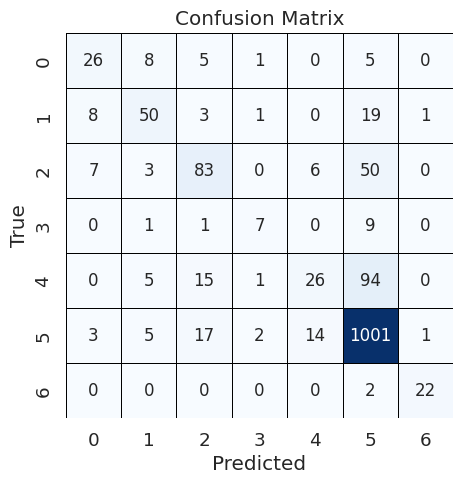

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

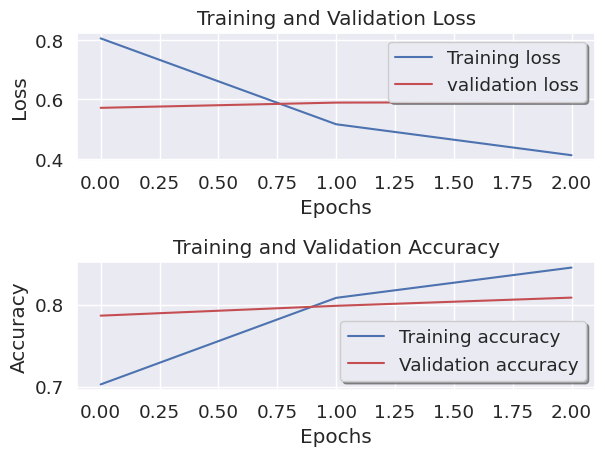

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 74ms/step - loss: 0.5883 - accuracy: 0.8116
 validation loss and accuracy are [0.5882810950279236, 0.8115845322608948]
0.5882810950279236 Test accuracy: 0.8116


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.41216        0.844936   0.59082      0.808383   0.588281   

   Test_Accuracy  
0       0.811585

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585

**#Iteration 6:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(learning_rate=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 66s 80ms/step - loss: 1.9316 - accuracy: 0.2154 - val_loss: 1.4585 - val_accuracy: 0.5689
Epoch 2/30
701/701 [==============================] - 54s 77ms/step - loss: 1.6328 - accuracy: 0.3874 - val_loss: 1.2304 - val_accuracy: 0.6507
Epoch 3/30
701/701 [==============================] - 54s 77ms/step - loss: 1.4821 - accuracy: 0.4665 - val_loss: 1.1137 - val_accuracy: 0.6707
Epoch 4/30
701/701 [==============================] - 55s 78ms/step - loss: 1.3870 - accuracy: 0.5153 - val_loss: 1.0652 - val_accuracy: 0.6760
Epoch 5/30
701/701 [==============================] - 54s 77ms/step - loss: 1.3188 - accuracy: 0.5362 - val_loss: 1.0055 - val_accuracy: 0.6800
Epoch 6/30
701/701 [==============================] - 56s 79ms/step - loss: 1.2741 - accuracy: 0.5553 - val_loss: 0.9675 - val_accuracy: 0.6919
Epoch 7/30
701/701 [==============================] - 54s 77ms/step - loss: 1.2406 - accuracy: 0.5626 - val_loss: 0.9510 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 10  17   8   1   0   9   0]
 [  4  36   8   0   4  26   4]
 [ 11  10  55   2  12  59   0]
 [  0   2   1   1   1  13   0]
 [  9   6  15   0  39  70   2]
 [  5  13  20   0  42 958   5]
 [  0   0   0   0   0   9  15]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.26      0.22      0.24        45
         bcc       0.43      0.44      0.43        82
         bkl       0.51      0.37      0.43       149
          df       0.25      0.06      0.09        18
         mel       0.40      0.28      0.33       141
          nv       0.84      0.92      0.88      1043
        vasc       0.58      0.62      0.60        24

    accuracy                           0.74      1502
   macro avg       0.47      0.42      0.43      1502
weighted avg       0.71      0.74      0.72      1502



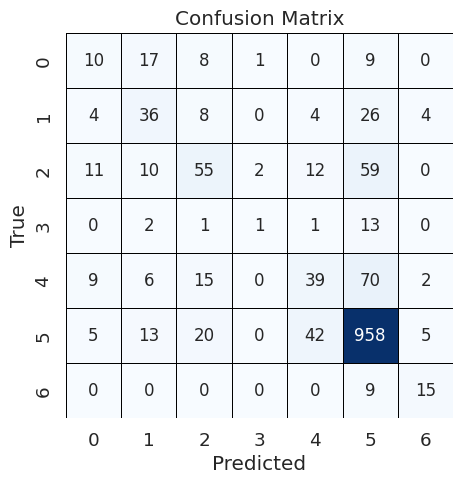

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

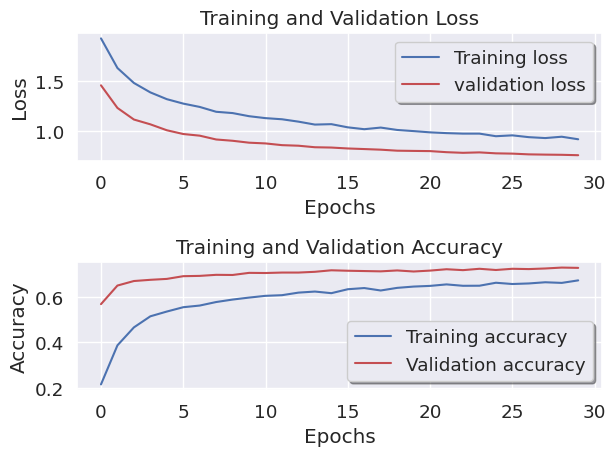

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.7566 - accuracy: 0.7417
 validation loss and accuracy are [0.75655597448349, 0.7416777610778809]
0.75655597448349 Test accuracy: 0.7417


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.914584        0.673467  0.753968      0.728543   0.756556   

   Test_Accuracy  
0       0.741678

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   
5    0.914584        0.673467  0.753968      0.728543   0.756556   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585  
5       0.741678

**#Iteration 7:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 67s 81ms/step - loss: 1.4564 - accuracy: 0.4459 - val_loss: 0.8799 - val_accuracy: 0.6906
Epoch 2/30
701/701 [==============================] - 54s 77ms/step - loss: 1.2756 - accuracy: 0.4979 - val_loss: 0.8333 - val_accuracy: 0.6966
Epoch 3/30
701/701 [==============================] - 53s 76ms/step - loss: 1.2115 - accuracy: 0.5194 - val_loss: 0.9023 - val_accuracy: 0.6993
Epoch 4/30
701/701 [==============================] - 52s 73ms/step - loss: 1.1780 - accuracy: 0.5407 - val_loss: 1.0941 - val_accuracy: 0.6114
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 16  13   1   0   1  14   0]
 [ 10  26   6   0   2  37   1]
 [ 19  31  11   0  10  78   0]
 [  1   5   0   0   0  12   0]
 [ 15   5   4   0  32  82   3]
 [  9  10  14   0  35 969   6]
 [  0   1   0   0   0   1  22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.23      0.36      0.28        45
         bcc       0.29      0.32      0.30        82
         bkl       0.31      0.07      0.12       149
          df       0.00      0.00      0.00        18
         mel       0.40      0.23      0.29       141
          nv       0.81      0.93      0.87      1043
        vasc       0.69      0.92      0.79        24

    accuracy                           0.72      1502
   macro avg       0.39      0.40      0.38      1502
weighted avg       0.67      0.72      0.68      1502



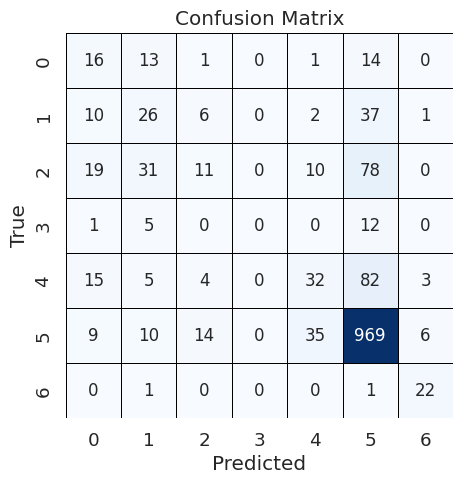

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

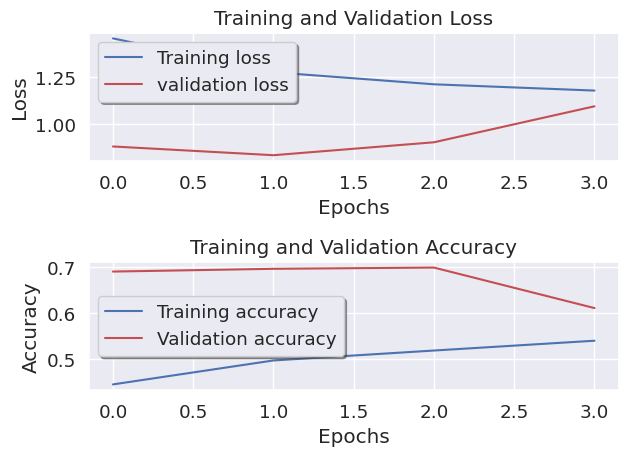

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.8694 - accuracy: 0.7144
 validation loss and accuracy are [0.869368851184845, 0.7143808007240295]
0.869368851184845 Test accuracy: 0.7144


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.177999        0.540656  1.094146      0.611444   0.869369   

   Test_Accuracy  
0       0.714381

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   
5    0.914584        0.673467  0.753968      0.728543   0.756556   
6    1.177999        0.540656  1.094146      0.611444   0.869369   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585  
5       0.741678  
6       0.714381

In [ ]:
#Iteration 8:

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 68s 83ms/step - loss: 1.1637 - accuracy: 0.5982 - val_loss: 0.7218 - val_accuracy: 0.7365
Epoch 2/30
701/701 [==============================] - 57s 82ms/step - loss: 0.7741 - accuracy: 0.7158 - val_loss: 0.7370 - val_accuracy: 0.7452
Epoch 3/30
701/701 [==============================] - 58s 83ms/step - loss: 0.6521 - accuracy: 0.7642 - val_loss: 0.7240 - val_accuracy: 0.7565
Epoch 3: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  9   4   6   4   7  15   0]
 [  4  21   2   6  14  33   2]
 [  4   3  39   3  33  67   0]
 [  0   1   1   6   1   9   0]
 [  3   0   8   2  56  71   1]
 [  4   3  12   4  56 964   0]
 [  0   0   0   0   1   5  18]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.38      0.20      0.26        45
         bcc       0.66      0.26      0.37        82
         bkl       0.57      0.26      0.36       149
          df       0.24      0.33      0.28        18
         mel       0.33      0.40      0.36       141
          nv       0.83      0.92      0.87      1043
        vasc       0.86      0.75      0.80        24

    accuracy                           0.74      1502
   macro avg       0.55      0.45      0.47      1502
weighted avg       0.73      0.74      0.72      1502



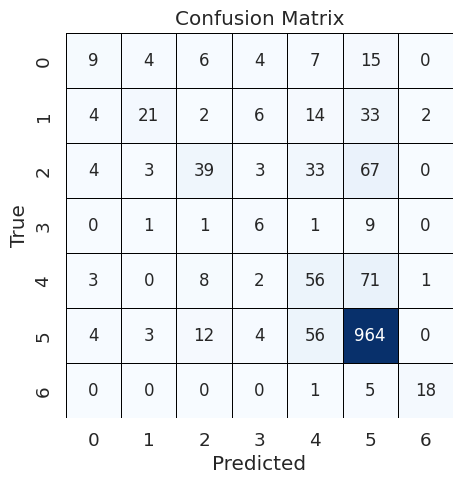

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

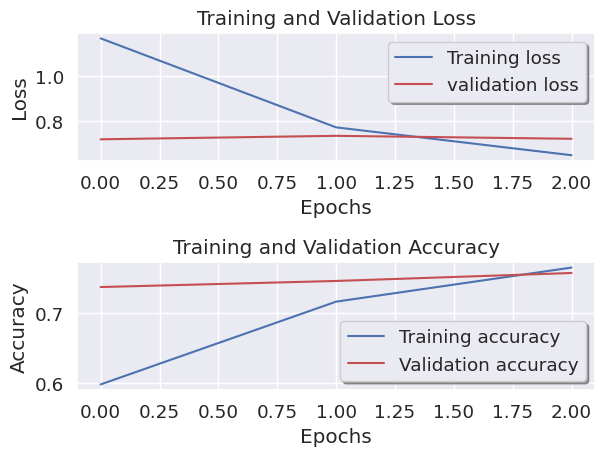

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6908 - accuracy: 0.7597
 validation loss and accuracy are [0.6908323168754578, 0.7596538066864014]
0.6908323168754578 Test accuracy: 0.7597


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.652098        0.764194  0.724003      0.756487   0.690832   

   Test_Accuracy  
0       0.759654

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   
5    0.914584        0.673467  0.753968      0.728543   0.756556   
6    1.177999        0.540656  1.094146      0.611444   0.869369   
7    0.652098        0.764194  0.724003      0.756487   0.690832   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585  
5       0.741678  
6       0.714381  
7       0.759654

**#Iteration 9:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.2))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 68s 84ms/step - loss: 1.2588 - accuracy: 0.5435 - val_loss: 0.7558 - val_accuracy: 0.7192
Epoch 2/30
701/701 [==============================] - 58s 83ms/step - loss: 0.9443 - accuracy: 0.6427 - val_loss: 0.6869 - val_accuracy: 0.7339
Epoch 3/30
701/701 [==============================] - 58s 82ms/step - loss: 0.8507 - accuracy: 0.6719 - val_loss: 0.7074 - val_accuracy: 0.7385
Epoch 4/30
701/701 [==============================] - 58s 83ms/step - loss: 0.7810 - accuracy: 0.7017 - val_loss: 0.6755 - val_accuracy: 0.7611
Epoch 5/30
701/701 [==============================] - 58s 83ms/step - loss: 0.7262 - accuracy: 0.7200 - val_loss: 0.6433 - val_accuracy: 0.7678
Epoch 6/30
701/701 [==============================] - 53s 76ms/step - loss: 0.6933 - accuracy: 0.7301 - val_loss: 0.6585 - val_accuracy: 0.7671
Epoch 7/30
701/701 [==============================] - 53s 76ms/step - loss: 0.6407 - accuracy: 0.7538 - val_loss: 0.7327 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 72ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 15  14   7   1   1   7   0]
 [  3  45   8   2   5  15   4]
 [  5  12  43   2  22  64   1]
 [  1   1   2   6   0   8   0]
 [  4   7  12   1  45  70   2]
 [  3  15   9   1  28 983   4]
 [  0   0   0   0   0   0  24]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.48      0.33      0.39        45
         bcc       0.48      0.55      0.51        82
         bkl       0.53      0.29      0.37       149
          df       0.46      0.33      0.39        18
         mel       0.45      0.32      0.37       141
          nv       0.86      0.94      0.90      1043
        vasc       0.69      1.00      0.81        24

    accuracy                           0.77      1502
   macro avg       0.56      0.54      0.54      1502
weighted avg       0.75      0.77      0.75      1502



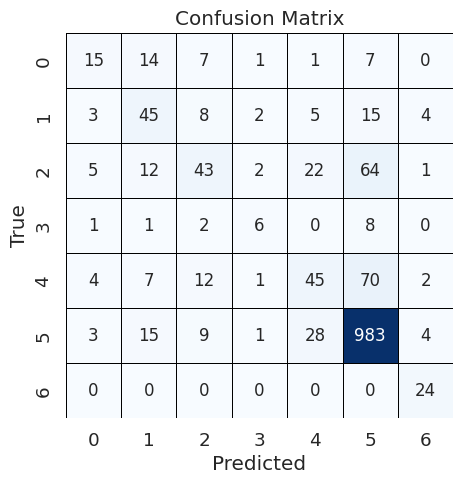

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

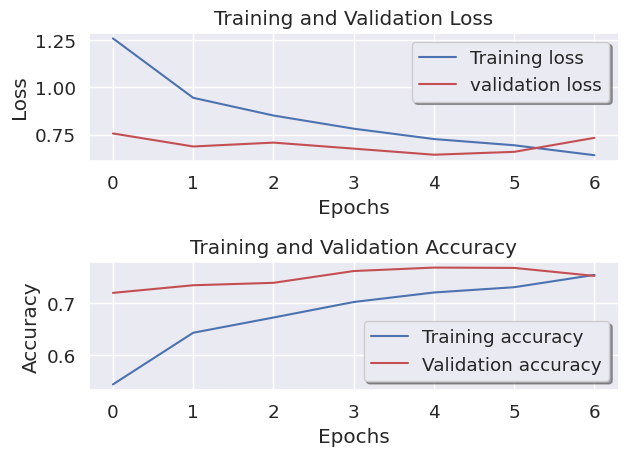

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6002 - accuracy: 0.7730
 validation loss and accuracy are [0.6001801490783691, 0.7729693651199341]
0.6001801490783691 Test accuracy: 0.7730


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.640718         0.75378  0.732685       0.75183    0.60018   

   Test_Accuracy  
0       0.772969

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   
5    0.914584        0.673467  0.753968      0.728543   0.756556   
6    1.177999        0.540656  1.094146      0.611444   0.869369   
7    0.652098        0.764194  0.724003      0.756487   0.690832   
8    0.640718        0.753780  0.732685      0.751830   0.600180   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585  
5       0.741678  
6       0.714381  
7       0.759654  
8       0.772969

**#Iteration 10:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 70s 84ms/step - loss: 1.4973 - accuracy: 0.4561 - val_loss: 0.7393 - val_accuracy: 0.7405
Epoch 2/30
701/701 [==============================] - 53s 76ms/step - loss: 1.1875 - accuracy: 0.5411 - val_loss: 0.7149 - val_accuracy: 0.7299
Epoch 3/30
701/701 [==============================] - 53s 75ms/step - loss: 1.1229 - accuracy: 0.5619 - val_loss: 0.7821 - val_accuracy: 0.7339
Epoch 4/30
701/701 [==============================] - 53s 76ms/step - loss: 1.0603 - accuracy: 0.5810 - val_loss: 0.7187 - val_accuracy: 0.7325
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  6  22   4   0   0  13   0]
 [  1  43   3   0   8  25   2]
 [  3  19  24   0  29  74   0]
 [  0   3   0   3   3   9   0]
 [  2  10   9   0  50  69   1]
 [  0  10   6   0  72 954   1]
 [  0   0   0   0   0  10  14]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.50      0.13      0.21        45
         bcc       0.40      0.52      0.46        82
         bkl       0.52      0.16      0.25       149
          df       1.00      0.17      0.29        18
         mel       0.31      0.35      0.33       141
          nv       0.83      0.91      0.87      1043
        vasc       0.78      0.58      0.67        24

    accuracy                           0.73      1502
   macro avg       0.62      0.41      0.44      1502
weighted avg       0.72      0.73      0.70      1502



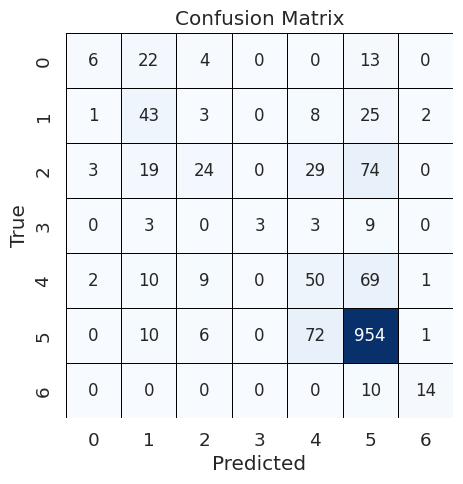

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

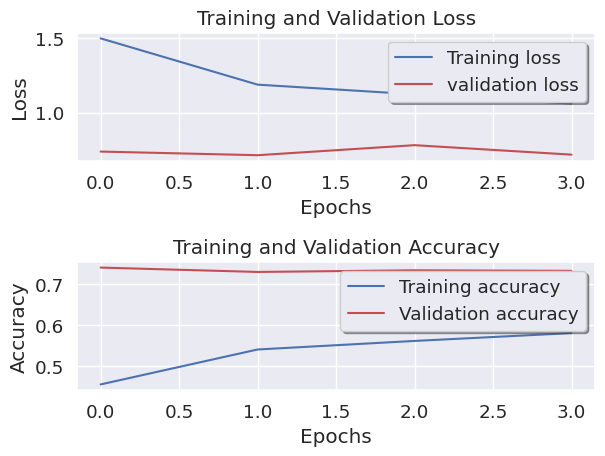

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.7188 - accuracy: 0.7503
 validation loss and accuracy are [0.7188436388969421, 0.7503328919410706]
0.7188436388969421 Test accuracy: 0.7503


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.060283        0.581027  0.718663      0.732535   0.718844   

   Test_Accuracy  
0       0.750333

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.474564        0.825963  0.587688      0.788423   0.568681   
1    0.646130        0.759486  0.636813      0.760479   0.689858   
2    0.697856        0.730023  0.631864      0.769128   0.611656   
3    0.534129        0.795007  0.620574      0.777778   0.620233   
4    0.412160        0.844936  0.590820      0.808383   0.588281   
5    0.914584        0.673467  0.753968      0.728543   0.756556   
6    1.177999        0.540656  1.094146      0.611444   0.869369   
7    0.652098        0.764194  0.724003      0.756487   0.690832   
8    0.640718        0.753780  0.732685      0.751830   0.600180   
9    1.060283        0.581027  0.718663      0.732535   0.718844   

   Test_Accuracy  
0       0.791611  
1       0.762983  
2       0.771638  
3       0.770972  
4       0.811585  
5       0.741678  
6       0.714381  
7       0.759654  
8       0.772969  
9       0.750333

**#Iteration 11:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 65s 79ms/step - loss: 1.2103 - accuracy: 0.5516 - val_loss: 0.7504 - val_accuracy: 0.7305
Epoch 2/30
701/701 [==============================] - 54s 77ms/step - loss: 0.8772 - accuracy: 0.6673 - val_loss: 0.6899 - val_accuracy: 0.7412
Epoch 3/30
701/701 [==============================] - 54s 77ms/step - loss: 0.7788 - accuracy: 0.7146 - val_loss: 0.6450 - val_accuracy: 0.7638
Epoch 4/30
701/701 [==============================] - 52s 73ms/step - loss: 0.7158 - accuracy: 0.7372 - val_loss: 0.6704 - val_accuracy: 0.7538
Epoch 5/30
701/701 [==============================] - 52s 74ms/step - loss: 0.6731 - accuracy: 0.7476 - val_loss: 0.6539 - val_accuracy: 0.7545
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 72ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  6   8  16   1   1  13   0]
 [  0  40  15   0   3  22   2]
 [  3   5  72   0  13  56   0]
 [  0   1   2   3   1  11   0]
 [  4   3  22   0  45  67   0]
 [  1  15  37   0  34 954   2]
 [  0   0   0   0   0   6  18]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.43      0.13      0.20        45
         bcc       0.56      0.49      0.52        82
         bkl       0.44      0.48      0.46       149
          df       0.75      0.17      0.27        18
         mel       0.46      0.32      0.38       141
          nv       0.84      0.91      0.88      1043
        vasc       0.82      0.75      0.78        24

    accuracy                           0.76      1502
   macro avg       0.61      0.46      0.50      1502
weighted avg       0.74      0.76      0.74      1502



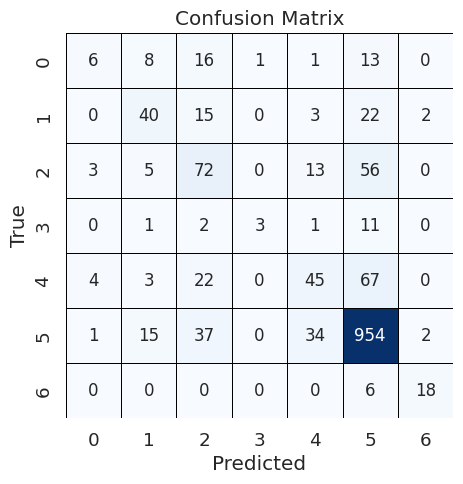

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

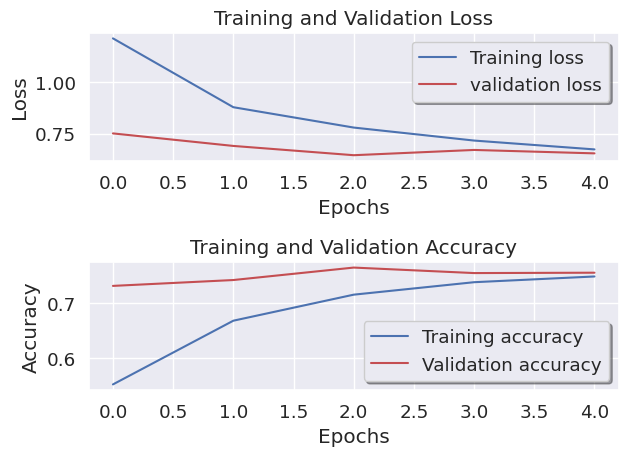

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6669 - accuracy: 0.7577
 validation loss and accuracy are [0.6668822765350342, 0.757656455039978]
0.6668822765350342 Test accuracy: 0.7577


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.673079        0.747646  0.653904      0.754491   0.666882   

   Test_Accuracy  
0       0.757656

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656

**#Iteration 12:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 241s 223ms/step - loss: 0.8024 - accuracy: 0.6991 - val_loss: 0.6646 - val_accuracy: 0.7285
Epoch 2/30
701/701 [==============================] - 155s 221ms/step - loss: 0.5044 - accuracy: 0.8201 - val_loss: 0.5913 - val_accuracy: 0.7791
Epoch 3/30
701/701 [==============================] - 155s 221ms/step - loss: 0.4071 - accuracy: 0.8514 - val_loss: 0.5379 - val_accuracy: 0.8097
Epoch 4/30
701/701 [==============================] - 154s 220ms/step - loss: 0.3517 - accuracy: 0.8720 - val_loss: 0.4665 - val_accuracy: 0.8117
Epoch 5/30
701/701 [==============================] - 153s 219ms/step - loss: 0.2871 - accuracy: 0.8967 - val_loss: 0.4904 - val_accuracy: 0.8177
Epoch 6/30
701/701 [==============================] - 148s 211ms/step - loss: 0.2698 - accuracy: 0.9048 - val_loss: 0.5782 - val_accuracy: 0.8104
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 70ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 30   4   9   0   0   2   0]
 [ 11  49   8   0   3  11   0]
 [  7   2 107   0  12  21   0]
 [  2   1   0   6   2   7   0]
 [  5   0  15   0  77  44   0]
 [  3   7  30   0  95 908   0]
 [  0   0   0   0   1   4  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.52      0.67      0.58        45
         bcc       0.78      0.60      0.68        82
         bkl       0.63      0.72      0.67       149
          df       1.00      0.33      0.50        18
         mel       0.41      0.55      0.47       141
          nv       0.91      0.87      0.89      1043
        vasc       1.00      0.79      0.88        24

    accuracy                           0.80      1502
   macro avg       0.75      0.65      0.67      1502
weighted avg       0.82      0.80      0.80      1502



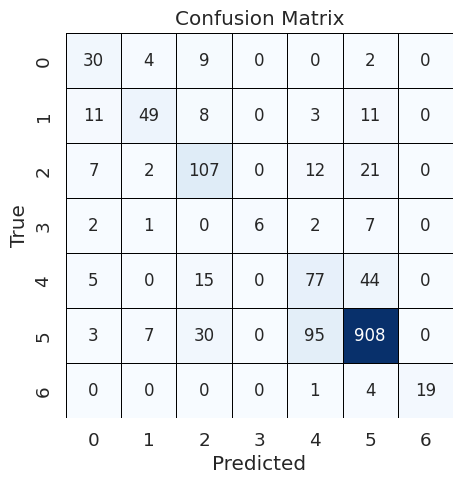

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

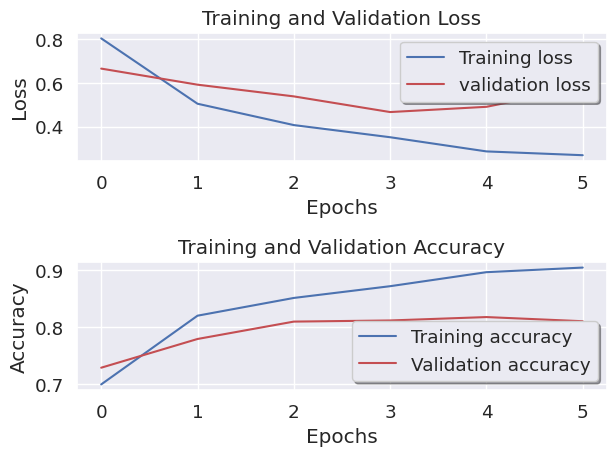

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.5469 - accuracy: 0.8136
 validation loss and accuracy are [0.5469154119491577, 0.8135818839073181]
0.5469154119491577 Test accuracy: 0.8136


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.26977        0.904823   0.57821      0.810379   0.546915   

   Test_Accuracy  
0       0.813582

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582

**#Iteration 13:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 65s 80ms/step - loss: 1.1678 - accuracy: 0.5572 - val_loss: 0.8888 - val_accuracy: 0.6667
Epoch 2/30
701/701 [==============================] - 53s 76ms/step - loss: 1.0118 - accuracy: 0.6133 - val_loss: 0.7402 - val_accuracy: 0.7345
Epoch 3/30
701/701 [==============================] - 51s 72ms/step - loss: 0.9390 - accuracy: 0.6525 - val_loss: 0.8554 - val_accuracy: 0.7119
Epoch 4/30
701/701 [==============================] - 51s 73ms/step - loss: 0.9201 - accuracy: 0.6588 - val_loss: 0.8246 - val_accuracy: 0.7272
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  5   3  21   0   8   8   0]
 [  5  24  24   0  14  15   0]
 [  5   1  69   0  42  32   0]
 [  2   0   4   0   5   7   0]
 [  3   2  20   0  66  50   0]
 [  1   6  47   0  73 915   1]
 [  0   5   2   0   1   3  13]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.24      0.11      0.15        45
         bcc       0.59      0.29      0.39        82
         bkl       0.37      0.46      0.41       149
          df       0.00      0.00      0.00        18
         mel       0.32      0.47      0.38       141
          nv       0.89      0.88      0.88      1043
        vasc       0.93      0.54      0.68        24

    accuracy                           0.73      1502
   macro avg       0.48      0.39      0.41      1502
weighted avg       0.74      0.73      0.73      1502



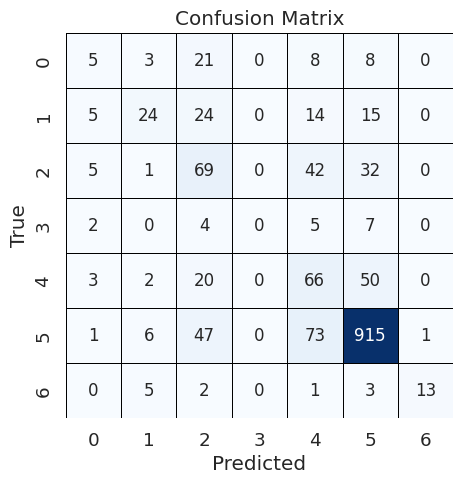

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

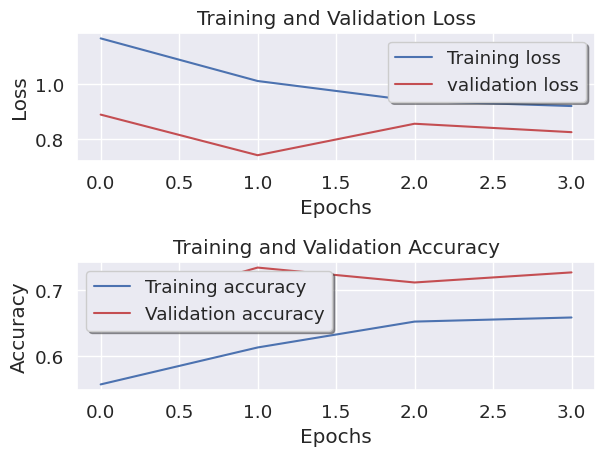

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.7797 - accuracy: 0.7270
 validation loss and accuracy are [0.7796722054481506, 0.7270306348800659]
0.7796722054481506 Test accuracy: 0.7270


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.920106        0.658773  0.824551      0.727212   0.779672   

   Test_Accuracy  
0       0.727031

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031

**#Iteration 14:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(learning_rate=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 68s 83ms/step - loss: 2.1268 - accuracy: 0.1826 - val_loss: 1.5337 - val_accuracy: 0.5961
Epoch 2/30
701/701 [==============================] - 54s 77ms/step - loss: 1.8948 - accuracy: 0.2567 - val_loss: 1.3433 - val_accuracy: 0.6707
Epoch 3/30
701/701 [==============================] - 54s 76ms/step - loss: 1.7824 - accuracy: 0.3034 - val_loss: 1.2259 - val_accuracy: 0.6813
Epoch 4/30
701/701 [==============================] - 52s 73ms/step - loss: 1.6823 - accuracy: 0.3504 - val_loss: 1.1287 - val_accuracy: 0.6813
Epoch 5/30
701/701 [==============================] - 54s 76ms/step - loss: 1.6303 - accuracy: 0.3688 - val_loss: 1.0831 - val_accuracy: 0.6853
Epoch 6/30
701/701 [==============================] - 54s 77ms/step - loss: 1.5895 - accuracy: 0.3967 - val_loss: 1.0499 - val_accuracy: 0.6873
Epoch 7/30
701/701 [==============================] - 53s 76ms/step - loss: 1.5547 - accuracy: 0.4136 - val_loss: 1.0289 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 70ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  6  14   7   1   0  17   0]
 [  1  31   1   0   4  42   3]
 [  4  18  31   0   7  89   0]
 [  0   3   1   0   1  13   0]
 [  3   8   9   1  33  87   0]
 [  1  13  12   0  37 979   1]
 [  0   0   0   0   0   7  17]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.40      0.13      0.20        45
         bcc       0.36      0.38      0.37        82
         bkl       0.51      0.21      0.30       149
          df       0.00      0.00      0.00        18
         mel       0.40      0.23      0.30       141
          nv       0.79      0.94      0.86      1043
        vasc       0.81      0.71      0.76        24

    accuracy                           0.73      1502
   macro avg       0.47      0.37      0.40      1502
weighted avg       0.68      0.73      0.69      1502



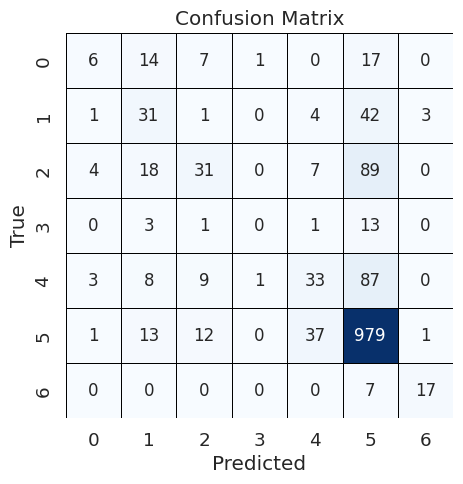

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

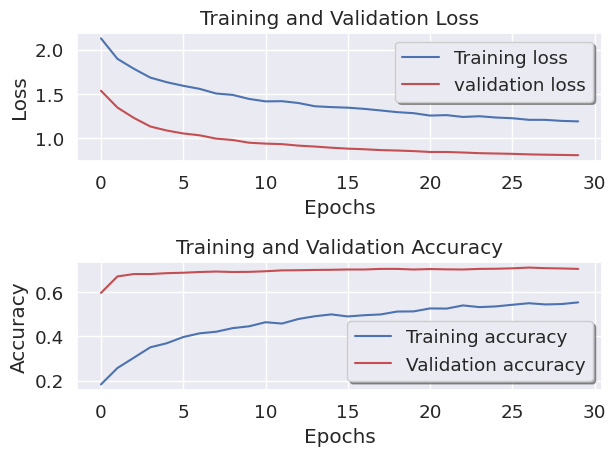

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 71ms/step - loss: 0.7960 - accuracy: 0.7297
 validation loss and accuracy are [0.796025276184082, 0.7296937704086304]
0.796025276184082 Test accuracy: 0.7297


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     1.18682        0.553352  0.803573      0.704591   0.796025   

   Test_Accuracy  
0       0.729694

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694

In [ ]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
#CHANGE  IN BATCH SIZE
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################

In [ ]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 32
val_batch_size = 32
test_batch_size = 32

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

**#Iteration 1:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/15_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 34s 113ms/step - loss: 1.6195 - accuracy: 0.5150 - val_loss: 0.9705 - val_accuracy: 0.7106
Epoch 2/30
220/220 [==============================] - 19s 87ms/step - loss: 1.0103 - accuracy: 0.6268 - val_loss: 0.8122 - val_accuracy: 0.7106
Epoch 3/30
220/220 [==============================] - 24s 111ms/step - loss: 0.8881 - accuracy: 0.6724 - val_loss: 0.7497 - val_accuracy: 0.7362
Epoch 4/30
220/220 [==============================] - 19s 84ms/step - loss: 0.7804 - accuracy: 0.7141 - val_loss: 0.8196 - val_accuracy: 0.7255
Epoch 5/30
220/220 [==============================] - 24s 110ms/step - loss: 0.7323 - accuracy: 0.7400 - val_loss: 0.8547 - val_accuracy: 0.7426
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 18   9   3   1   0  14   0]
 [  5  37   4   2   8  25   1]
 [ 11   8  31   1  15  82   1]
 [  1   0   0   7   0  10   0]
 [ 13   4   4   2  27  89   2]
 [  5   7  12   0  22 997   0]
 [  0   0   0   0   0   5  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.34      0.40      0.37        45
         bcc       0.57      0.45      0.50        82
         bkl       0.57      0.21      0.31       149
          df       0.54      0.39      0.45        18
         mel       0.38      0.19      0.25       141
          nv       0.82      0.96      0.88      1043
        vasc       0.83      0.79      0.81        24

    accuracy                           0.76      1502
   macro avg       0.58      0.48      0.51      1502
weighted avg       0.72      0.76      0.72      1502



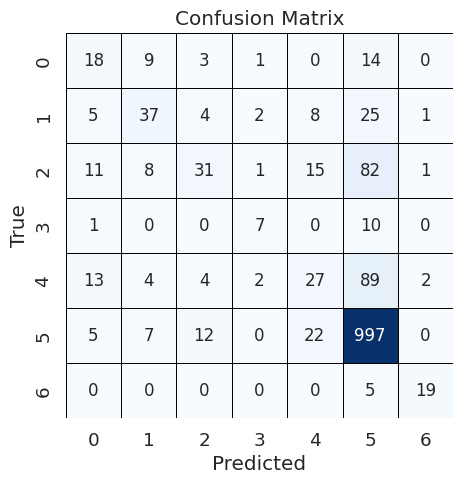

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

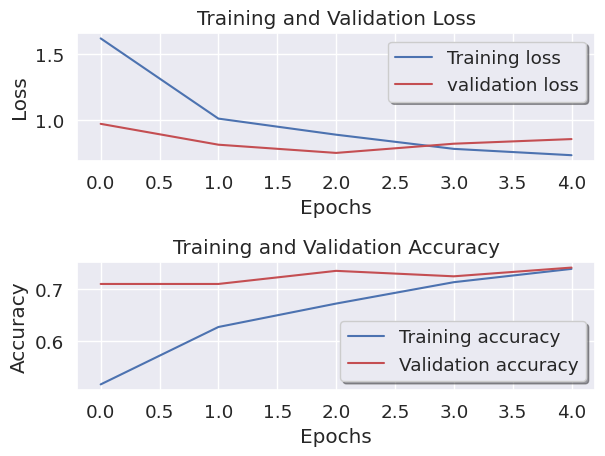

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/15_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 74ms/step - loss: 0.8251 - accuracy: 0.7577
 validation loss and accuracy are [0.8250983357429504, 0.757656455039978]
0.8250983357429504 Test accuracy: 0.7577


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.732282            0.74  0.854749      0.742553   0.825098   

   Test_Accuracy  
0       0.757656

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656

In [ ]:
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656

**#Iteration 2:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.2))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/16_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 37s 113ms/step - loss: 1.8123 - accuracy: 0.4932 - val_loss: 0.7942 - val_accuracy: 0.7191
Epoch 2/30
220/220 [==============================] - 19s 86ms/step - loss: 1.0529 - accuracy: 0.6069 - val_loss: 0.6955 - val_accuracy: 0.7170
Epoch 3/30
220/220 [==============================] - 24s 108ms/step - loss: 0.9744 - accuracy: 0.6291 - val_loss: 0.7754 - val_accuracy: 0.7362
Epoch 4/30
220/220 [==============================] - 19s 86ms/step - loss: 0.8437 - accuracy: 0.6850 - val_loss: 0.7868 - val_accuracy: 0.7085
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 70ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 16   5   9   1   1  13   0]
 [ 10  24  15   1   2  27   3]
 [  8   1  88   1   6  45   0]
 [  2   0   4   4   0   8   0]
 [  6   3  47   1  17  65   2]
 [  5   5  59   1  12 957   4]
 [  0   0   1   0   0   2  21]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.34      0.36      0.35        45
         bcc       0.63      0.29      0.40        82
         bkl       0.39      0.59      0.47       149
          df       0.44      0.22      0.30        18
         mel       0.45      0.12      0.19       141
          nv       0.86      0.92      0.89      1043
        vasc       0.70      0.88      0.78        24

    accuracy                           0.75      1502
   macro avg       0.55      0.48      0.48      1502
weighted avg       0.74      0.75      0.73      1502



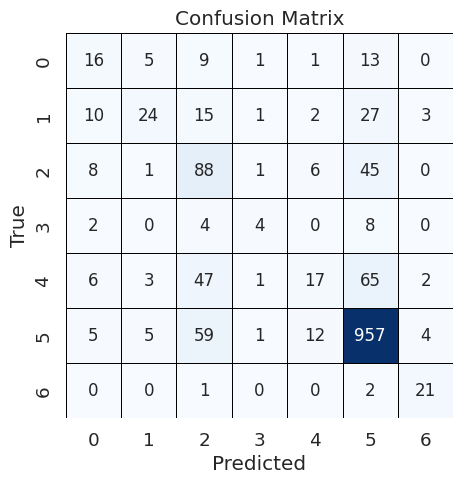

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

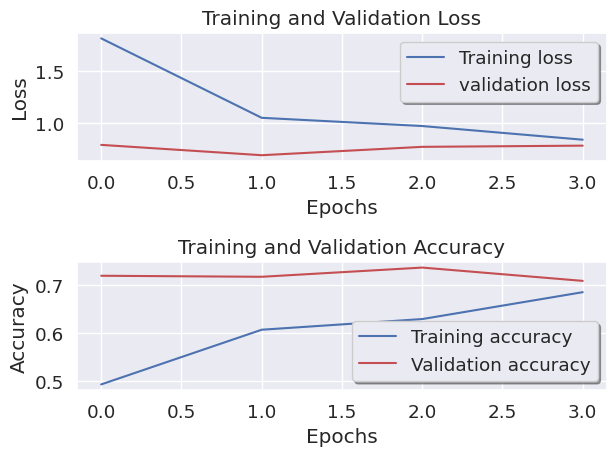

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/16_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.7118 - accuracy: 0.7550
 validation loss and accuracy are [0.7118358612060547, 0.7549933195114136]
0.7118358612060547 Test accuracy: 0.7550


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.843679           0.685  0.786848      0.708511   0.711836   

   Test_Accuracy  
0       0.754993

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993

**#Iteration 3:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/17_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 34s 113ms/step - loss: 2.0515 - accuracy: 0.4105 - val_loss: 0.9473 - val_accuracy: 0.6553
Epoch 2/30
220/220 [==============================] - 22s 99ms/step - loss: 1.3354 - accuracy: 0.4905 - val_loss: 0.8613 - val_accuracy: 0.6936
Epoch 3/30
220/220 [==============================] - 22s 101ms/step - loss: 1.2226 - accuracy: 0.5345 - val_loss: 0.7170 - val_accuracy: 0.7511
Epoch 4/30
220/220 [==============================] - 18s 82ms/step - loss: 1.1578 - accuracy: 0.5445 - val_loss: 0.7720 - val_accuracy: 0.7170
Epoch 5/30
220/220 [==============================] - 19s 85ms/step - loss: 1.1135 - accuracy: 0.5723 - val_loss: 0.7236 - val_accuracy: 0.7277
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 14  10   5   2   3  11   0]
 [  7  41   2   1   6  20   5]
 [ 18  11  45   1  31  41   2]
 [  3   1   1   3   1   9   0]
 [ 15   3  19   0  55  48   1]
 [  5  10  22   2 102 893   9]
 [  0   0   0   0   0   1  23]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.23      0.31      0.26        45
         bcc       0.54      0.50      0.52        82
         bkl       0.48      0.30      0.37       149
          df       0.33      0.17      0.22        18
         mel       0.28      0.39      0.32       141
          nv       0.87      0.86      0.86      1043
        vasc       0.57      0.96      0.72        24

    accuracy                           0.72      1502
   macro avg       0.47      0.50      0.47      1502
weighted avg       0.73      0.72      0.72      1502



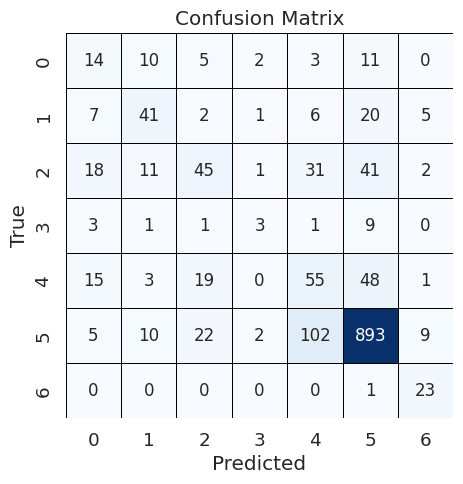

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

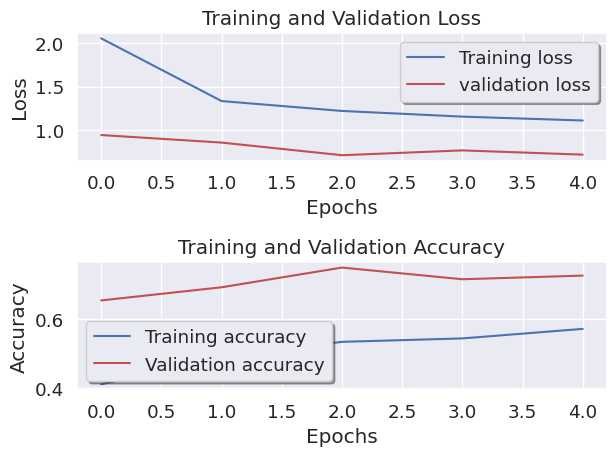

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/17_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.7841 - accuracy: 0.7150
 validation loss and accuracy are [0.784069836139679, 0.7150465846061707]
0.784069836139679 Test accuracy: 0.7150


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.113499        0.572338  0.723566       0.72766    0.78407   

   Test_Accuracy  
0       0.715047

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047

**#Iteration 4:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/18_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 33s 107ms/step - loss: 1.3702 - accuracy: 0.4918 - val_loss: 0.8724 - val_accuracy: 0.7043
Epoch 2/30
220/220 [==============================] - 19s 87ms/step - loss: 1.0831 - accuracy: 0.5836 - val_loss: 0.7094 - val_accuracy: 0.7489
Epoch 3/30
220/220 [==============================] - 16s 74ms/step - loss: 0.9354 - accuracy: 0.6464 - val_loss: 0.7036 - val_accuracy: 0.7447
Epoch 4/30
220/220 [==============================] - 19s 85ms/step - loss: 0.8788 - accuracy: 0.6714 - val_loss: 0.6891 - val_accuracy: 0.7532
Epoch 5/30
220/220 [==============================] - 16s 74ms/step - loss: 0.8205 - accuracy: 0.7023 - val_loss: 0.6613 - val_accuracy: 0.7489
Epoch 6/30
220/220 [==============================] - 16s 73ms/step - loss: 0.7888 - accuracy: 0.7100 - val_loss: 0.7006 - val_accuracy: 0.7362
Epoch 7/30
220/220 [==============================] - 16s 75ms/step - loss: 0.7490 - accuracy: 0.7150 - val_loss: 0.7822 - val_accuracy

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 23   4   8   1   3   6   0]
 [ 15  25  14   0   6  20   2]
 [ 13   3  73   2  22  35   1]
 [  1   1   2   4   2   8   0]
 [ 12   1  27   0  56  44   1]
 [ 11   4  47   0  76 904   1]
 [  0   0   0   0   1   4  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.31      0.51      0.38        45
         bcc       0.66      0.30      0.42        82
         bkl       0.43      0.49      0.46       149
          df       0.57      0.22      0.32        18
         mel       0.34      0.40      0.36       141
          nv       0.89      0.87      0.88      1043
        vasc       0.79      0.79      0.79        24

    accuracy                           0.74      1502
   macro avg       0.57      0.51      0.52      1502
weighted avg       0.75      0.74      0.74      1502



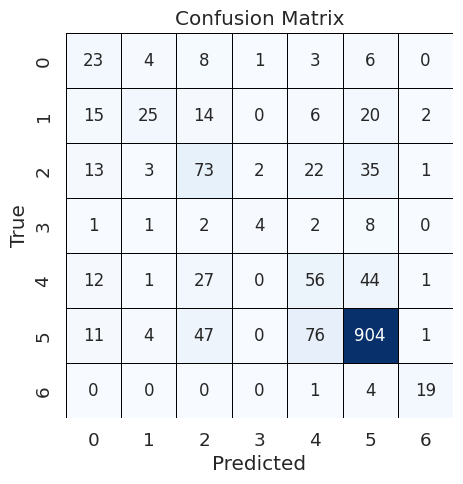

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

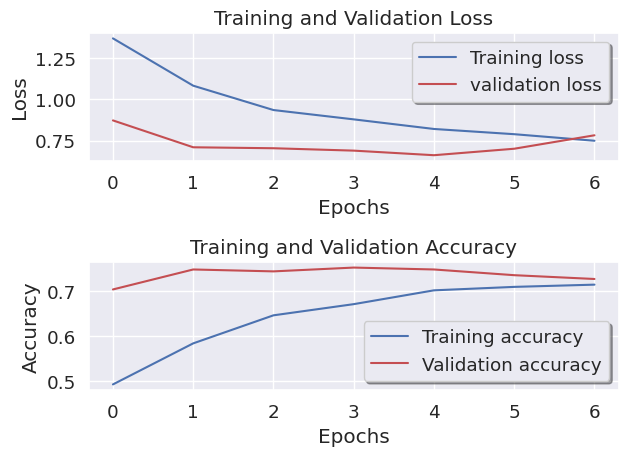

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/18_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 71ms/step - loss: 0.6953 - accuracy: 0.7530
 validation loss and accuracy are [0.6953330039978027, 0.752996027469635]
0.6953330039978027 Test accuracy: 0.7530


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.749038           0.715  0.782182       0.72766   0.695333   

   Test_Accuracy  
0       0.752996

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996

**#Iteration 5:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/19_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 136s 241ms/step - loss: 1.0664 - accuracy: 0.5932 - val_loss: 0.8589 - val_accuracy: 0.6851
Epoch 2/30
220/220 [==============================] - 52s 234ms/step - loss: 0.6861 - accuracy: 0.7523 - val_loss: 0.7990 - val_accuracy: 0.7106
Epoch 3/30
220/220 [==============================] - 52s 234ms/step - loss: 0.6307 - accuracy: 0.7573 - val_loss: 0.5345 - val_accuracy: 0.8149
Epoch 4/30
220/220 [==============================] - 46s 211ms/step - loss: 0.5406 - accuracy: 0.8041 - val_loss: 0.5786 - val_accuracy: 0.7872
Epoch 5/30
220/220 [==============================] - 47s 213ms/step - loss: 0.5002 - accuracy: 0.8205 - val_loss: 0.5630 - val_accuracy: 0.7894
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 22   7   6   0   5   5   0]
 [  4  48  10   0   5  15   0]
 [  1   5  81   1  18  43   0]
 [  1   1   1   8   0   7   0]
 [  0   2  11   2  93  32   1]
 [  0   7  19   0 114 903   0]
 [  0   0   1   0   1   8  14]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.79      0.49      0.60        45
         bcc       0.69      0.59      0.63        82
         bkl       0.63      0.54      0.58       149
          df       0.73      0.44      0.55        18
         mel       0.39      0.66      0.49       141
          nv       0.89      0.87      0.88      1043
        vasc       0.93      0.58      0.72        24

    accuracy                           0.78      1502
   macro avg       0.72      0.60      0.64      1502
weighted avg       0.80      0.78      0.78      1502



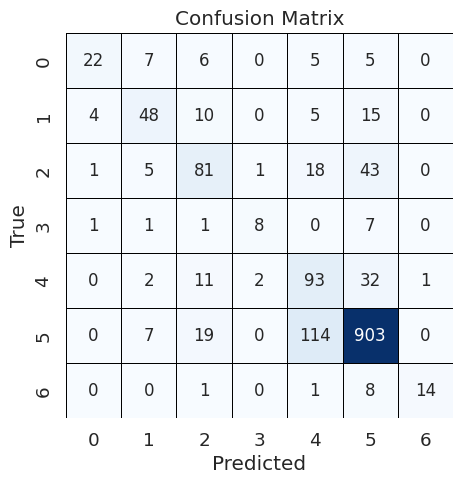

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

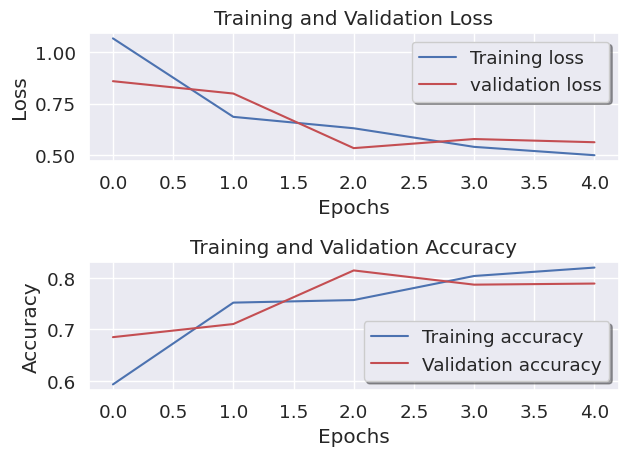

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/19_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.5688 - accuracy: 0.7783
 validation loss and accuracy are [0.5687610507011414, 0.7782955765724182]
0.5687610507011414 Test accuracy: 0.7783


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.500163        0.820455  0.563024      0.789362   0.568761   

   Test_Accuracy  
0       0.778296

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296

**#Iteration 6:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/20_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 30s 95ms/step - loss: 1.3061 - accuracy: 0.5159 - val_loss: 1.0398 - val_accuracy: 0.6532
Epoch 2/30
220/220 [==============================] - 19s 86ms/step - loss: 1.1290 - accuracy: 0.5668 - val_loss: 0.8193 - val_accuracy: 0.6979
Epoch 3/30
220/220 [==============================] - 16s 74ms/step - loss: 1.0373 - accuracy: 0.6068 - val_loss: 0.9513 - val_accuracy: 0.6681
Epoch 4/30
220/220 [==============================] - 19s 85ms/step - loss: 1.0055 - accuracy: 0.6345 - val_loss: 0.7828 - val_accuracy: 0.7149
Epoch 5/30
220/220 [==============================] - 19s 85ms/step - loss: 0.9800 - accuracy: 0.6382 - val_loss: 0.8392 - val_accuracy: 0.7255
Epoch 6/30
220/220 [==============================] - 17s 76ms/step - loss: 0.9672 - accuracy: 0.6450 - val_loss: 0.8454 - val_accuracy: 0.6872
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 72ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 23   5   4   1   0  12   0]
 [ 20  17  10   1   0  31   3]
 [ 24   4  25   2  12  80   2]
 [  2   0   0   6   1   9   0]
 [ 14   1   8   4  28  84   2]
 [ 11   4  15   8  21 981   3]
 [  0   0   0   0   0   2  22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.24      0.51      0.33        45
         bcc       0.55      0.21      0.30        82
         bkl       0.40      0.17      0.24       149
          df       0.27      0.33      0.30        18
         mel       0.45      0.20      0.28       141
          nv       0.82      0.94      0.88      1043
        vasc       0.69      0.92      0.79        24

    accuracy                           0.73      1502
   macro avg       0.49      0.47      0.44      1502
weighted avg       0.70      0.73      0.70      1502



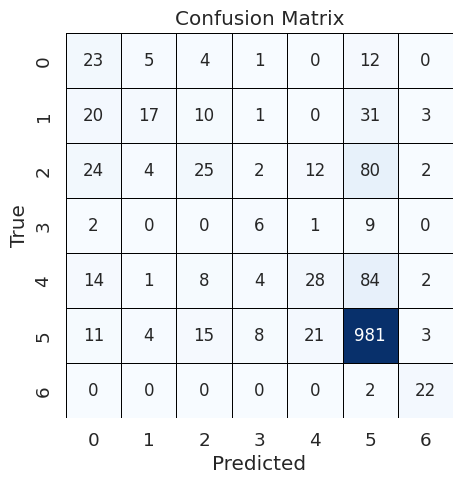

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

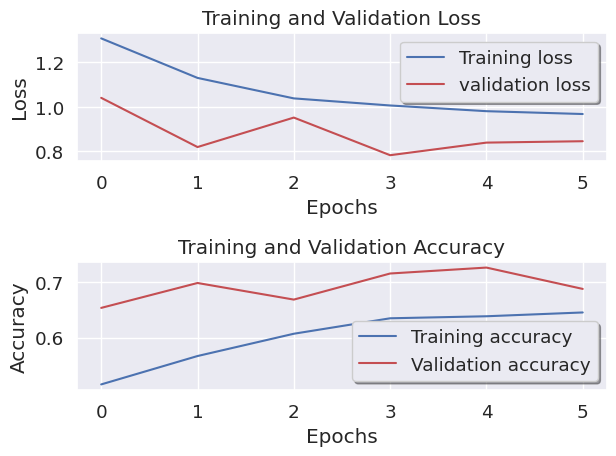

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/20_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 75ms/step - loss: 0.8459 - accuracy: 0.7130
 validation loss and accuracy are [0.8459399342536926, 0.7130492925643921]
0.8459399342536926 Test accuracy: 0.7130


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.967235           0.645  0.845414      0.687234    0.84594   

   Test_Accuracy  
0       0.713049

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049

**#Iteration 7:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/21_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 31s 97ms/step - loss: 1.5631 - accuracy: 0.4136 - val_loss: 1.0286 - val_accuracy: 0.6468
Epoch 2/30
220/220 [==============================] - 19s 88ms/step - loss: 1.4041 - accuracy: 0.4468 - val_loss: 0.8250 - val_accuracy: 0.7191
Epoch 3/30
220/220 [==============================] - 17s 75ms/step - loss: 1.3249 - accuracy: 0.4886 - val_loss: 0.9229 - val_accuracy: 0.6809
Epoch 4/30
220/220 [==============================] - 17s 76ms/step - loss: 1.3723 - accuracy: 0.4641 - val_loss: 0.8403 - val_accuracy: 0.6872
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 70ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  0   2   0   0  27  15   1]
 [  0   0   1   0  34  43   4]
 [  0   4   2   1  57  83   2]
 [  0   0   0   0   4  14   0]
 [  0   1   0   0  48  90   2]
 [  0   2   2   0  50 987   2]
 [  0   0   0   0   0   7  17]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        45
         bcc       0.00      0.00      0.00        82
         bkl       0.40      0.01      0.03       149
          df       0.00      0.00      0.00        18
         mel       0.22      0.34      0.27       141
          nv       0.80      0.95      0.87      1043
        vasc       0.61      0.71      0.65        24

    accuracy                           0.70      1502
   macro avg       0.29      0.29      0.26      1502
weighted avg       0.62      0.70      0.64      1502



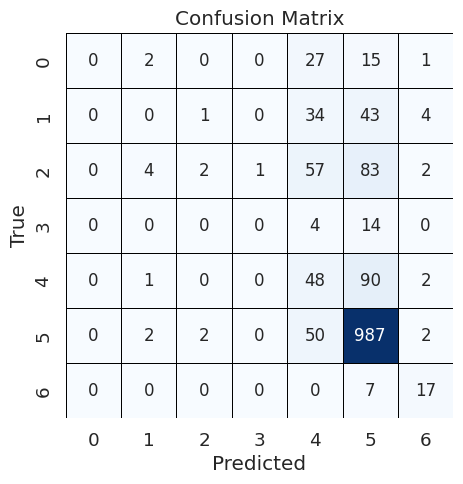

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

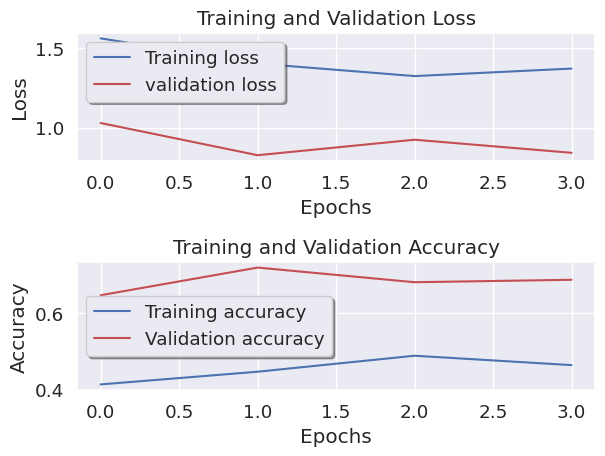

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/21_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 71ms/step - loss: 0.8839 - accuracy: 0.7017
 validation loss and accuracy are [0.8838657140731812, 0.7017310261726379]
0.8838657140731812 Test accuracy: 0.7017


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.372283        0.464091   0.84028      0.687234   0.883866   

   Test_Accuracy  
0       0.701731

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731

**#Iteration 8:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/22_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 32s 102ms/step - loss: 1.5055 - accuracy: 0.5300 - val_loss: 0.8178 - val_accuracy: 0.6936
Epoch 2/30
220/220 [==============================] - 19s 87ms/step - loss: 0.9795 - accuracy: 0.6305 - val_loss: 0.7345 - val_accuracy: 0.7255
Epoch 3/30
220/220 [==============================] - 17s 76ms/step - loss: 0.9042 - accuracy: 0.6636 - val_loss: 1.0022 - val_accuracy: 0.6426
Epoch 4/30
220/220 [==============================] - 21s 97ms/step - loss: 0.8482 - accuracy: 0.6836 - val_loss: 0.7161 - val_accuracy: 0.7404
Epoch 5/30
220/220 [==============================] - 18s 84ms/step - loss: 0.7540 - accuracy: 0.7077 - val_loss: 0.8172 - val_accuracy: 0.7511
Epoch 6/30
220/220 [==============================] - 22s 99ms/step - loss: 0.7407 - accuracy: 0.7205 - val_loss: 0.6520 - val_accuracy: 0.7809
Epoch 7/30
220/220 [==============================] - 17s 76ms/step - loss: 0.6965 - accuracy: 0.7364 - val_loss: 0.6730 - val_accuracy

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 72ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 24  10   9   0   1   1   0]
 [ 19  34  11   0   4  14   0]
 [ 13   8  73   1  22  32   0]
 [  0   1   4   4   2   7   0]
 [ 10   4  23   0  57  47   0]
 [ 11  12  32   0  48 939   1]
 [  0   0   0   0   0   4  20]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.31      0.53      0.39        45
         bcc       0.49      0.41      0.45        82
         bkl       0.48      0.49      0.49       149
          df       0.80      0.22      0.35        18
         mel       0.43      0.40      0.41       141
          nv       0.90      0.90      0.90      1043
        vasc       0.95      0.83      0.89        24

    accuracy                           0.77      1502
   macro avg       0.62      0.54      0.55      1502
weighted avg       0.77      0.77      0.77      1502



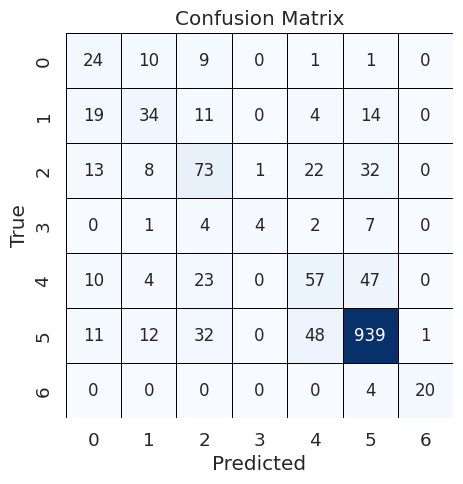

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

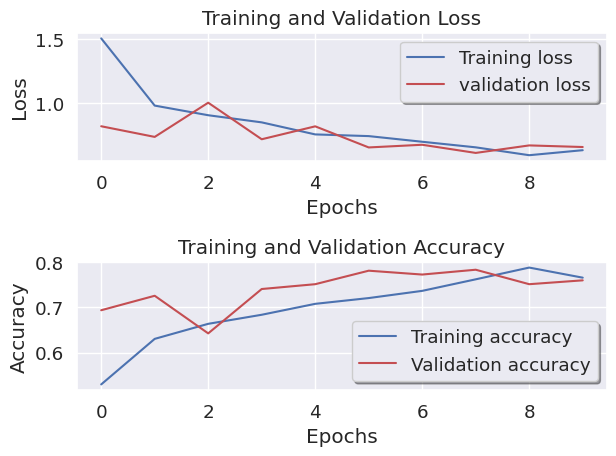

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/22_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 73ms/step - loss: 0.6211 - accuracy: 0.7663
 validation loss and accuracy are [0.6211390495300293, 0.7663115859031677]
0.6211390495300293 Test accuracy: 0.7663


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.63054        0.765455   0.65536      0.759574   0.621139   

   Test_Accuracy  
0       0.766312

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312

**#Iteration 9:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.2))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/23_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 32s 101ms/step - loss: 1.5884 - accuracy: 0.4591 - val_loss: 0.9842 - val_accuracy: 0.6957
Epoch 2/30
220/220 [==============================] - 17s 79ms/step - loss: 1.1659 - accuracy: 0.5627 - val_loss: 0.9215 - val_accuracy: 0.6574
Epoch 3/30
220/220 [==============================] - 26s 117ms/step - loss: 1.0660 - accuracy: 0.6045 - val_loss: 0.8562 - val_accuracy: 0.6979
Epoch 4/30
220/220 [==============================] - 17s 78ms/step - loss: 1.0322 - accuracy: 0.6100 - val_loss: 0.7886 - val_accuracy: 0.6915
Epoch 5/30
220/220 [==============================] - 24s 110ms/step - loss: 0.9756 - accuracy: 0.6355 - val_loss: 0.7895 - val_accuracy: 0.7362
Epoch 6/30
220/220 [==============================] - 17s 78ms/step - loss: 0.9208 - accuracy: 0.6545 - val_loss: 0.7118 - val_accuracy: 0.7000
Epoch 7/30
220/220 [==============================] - 25s 115ms/step - loss: 0.8396 - accuracy: 0.6818 - val_loss: 0.6431 - val_accur

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  5  21   9   0   3   7   0]
 [  0  57   4   1   5  13   2]
 [  6  18  55   2  27  41   0]
 [  0   4   1   2   4   7   0]
 [  5  12  16   0  52  55   1]
 [  3  20  24   0  59 932   5]
 [  0   0   0   0   1   2  21]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.26      0.11      0.16        45
         bcc       0.43      0.70      0.53        82
         bkl       0.50      0.37      0.43       149
          df       0.40      0.11      0.17        18
         mel       0.34      0.37      0.36       141
          nv       0.88      0.89      0.89      1043
        vasc       0.72      0.88      0.79        24

    accuracy                           0.75      1502
   macro avg       0.51      0.49      0.48      1502
weighted avg       0.74      0.75      0.74      1502



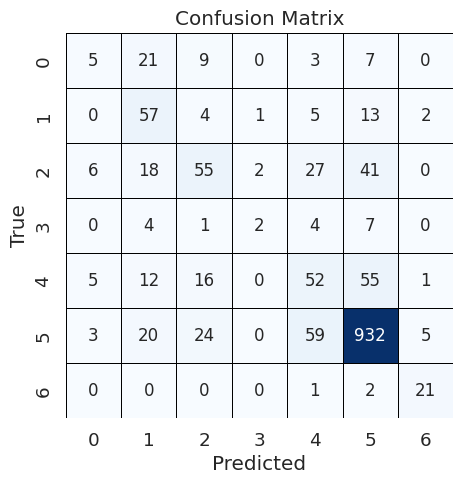

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

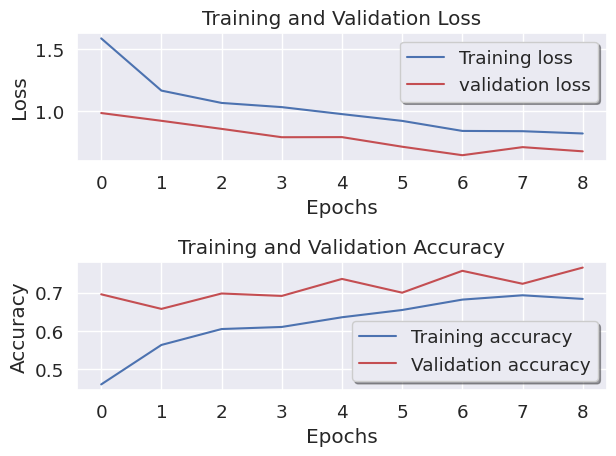

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/23_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.7187 - accuracy: 0.7630
 validation loss and accuracy are [0.7187122106552124, 0.7629826664924622]
0.7187122106552124 Test accuracy: 0.7630


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.818892        0.683636  0.674507      0.765957   0.718712   

   Test_Accuracy  
0       0.762983

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983

**#Iteration 10:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/24_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 32s 101ms/step - loss: 1.7606 - accuracy: 0.3932 - val_loss: 0.8918 - val_accuracy: 0.6894
Epoch 2/30
220/220 [==============================] - 22s 101ms/step - loss: 1.3385 - accuracy: 0.4745 - val_loss: 0.7757 - val_accuracy: 0.6936
Epoch 3/30
220/220 [==============================] - 22s 99ms/step - loss: 1.3002 - accuracy: 0.4836 - val_loss: 0.7992 - val_accuracy: 0.7043
Epoch 4/30
220/220 [==============================] - 19s 88ms/step - loss: 1.2525 - accuracy: 0.5118 - val_loss: 0.7777 - val_accuracy: 0.7106
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 73ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  8   9  21   1   0   6   0]
 [  1  32  32   4   1  11   1]
 [  5   7  93   2   2  39   1]
 [  0   0   9   1   0   8   0]
 [  1   5  58   1   7  67   2]
 [  1   7 124   0   4 906   1]
 [  0   1   1   0   0   7  15]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.50      0.18      0.26        45
         bcc       0.52      0.39      0.45        82
         bkl       0.28      0.62      0.38       149
          df       0.11      0.06      0.07        18
         mel       0.50      0.05      0.09       141
          nv       0.87      0.87      0.87      1043
        vasc       0.75      0.62      0.68        24

    accuracy                           0.71      1502
   macro avg       0.50      0.40      0.40      1502
weighted avg       0.73      0.71      0.69      1502



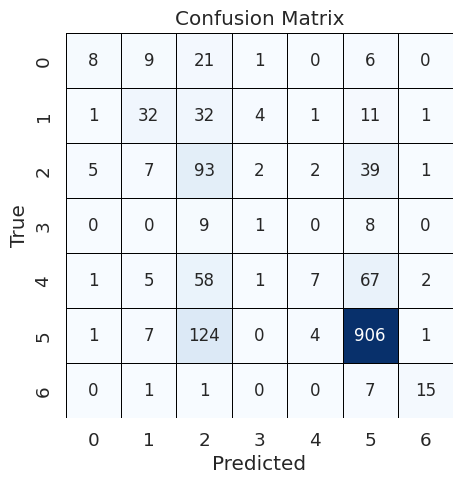

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

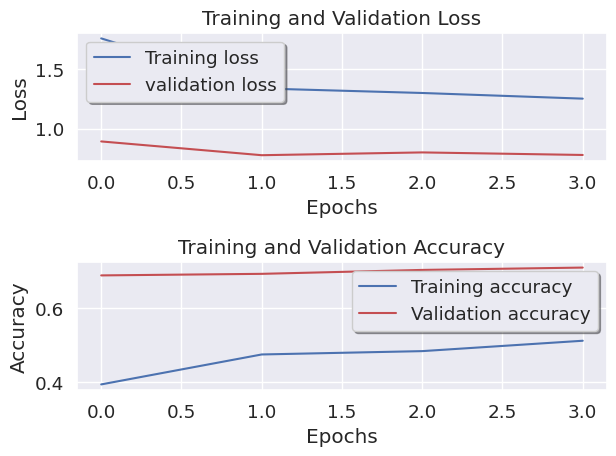

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/24_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.7505 - accuracy: 0.7317
 validation loss and accuracy are [0.7505398988723755, 0.7316910624504089]
0.7505398988723755 Test accuracy: 0.7317


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.252455        0.511818  0.777699      0.710638    0.75054   

   Test_Accuracy  
0       0.731691

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   
23    1.252455        0.511818  0.777699      0.710638   0.750540   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983  
23       0.731691

**#Iteration 11:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/25_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 30s 94ms/step - loss: 1.4760 - accuracy: 0.4455 - val_loss: 1.0330 - val_accuracy: 0.6574
Epoch 2/30
220/220 [==============================] - 19s 85ms/step - loss: 1.1188 - accuracy: 0.5841 - val_loss: 0.7693 - val_accuracy: 0.7213
Epoch 3/30
220/220 [==============================] - 22s 101ms/step - loss: 0.9676 - accuracy: 0.6368 - val_loss: 0.7794 - val_accuracy: 0.7340
Epoch 4/30
220/220 [==============================] - 16s 74ms/step - loss: 0.9376 - accuracy: 0.6641 - val_loss: 0.7294 - val_accuracy: 0.7191
Epoch 5/30
220/220 [==============================] - 16s 74ms/step - loss: 0.8736 - accuracy: 0.6677 - val_loss: 0.7232 - val_accuracy: 0.7340
Epoch 6/30
220/220 [==============================] - 16s 73ms/step - loss: 0.8103 - accuracy: 0.6955 - val_loss: 0.7422 - val_accuracy: 0.7149
Epoch 7/30
220/220 [==============================] - 16s 74ms/step - loss: 0.7821 - accuracy: 0.7055 - val_loss: 0.7199 - val_accuracy

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 72ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 18  13   5   1   1   7   0]
 [  5  51   8   1   1  13   3]
 [  8  17  60   0  18  45   1]
 [  0   1   1   4   3   9   0]
 [  9   9  13   0  52  58   0]
 [  5  16  29   0  42 950   1]
 [  0   0   0   0   0   2  22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.40      0.40      0.40        45
         bcc       0.48      0.62      0.54        82
         bkl       0.52      0.40      0.45       149
          df       0.67      0.22      0.33        18
         mel       0.44      0.37      0.40       141
          nv       0.88      0.91      0.89      1043
        vasc       0.81      0.92      0.86        24

    accuracy                           0.77      1502
   macro avg       0.60      0.55      0.55      1502
weighted avg       0.76      0.77      0.76      1502



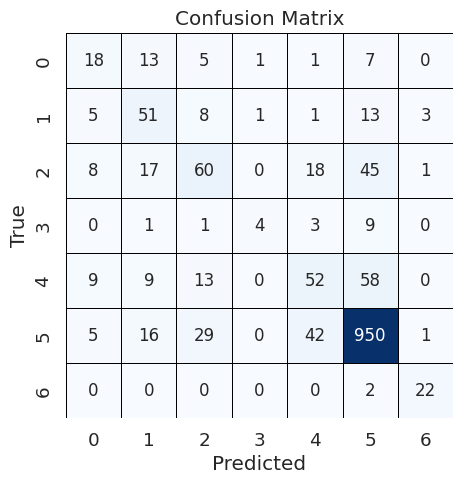

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

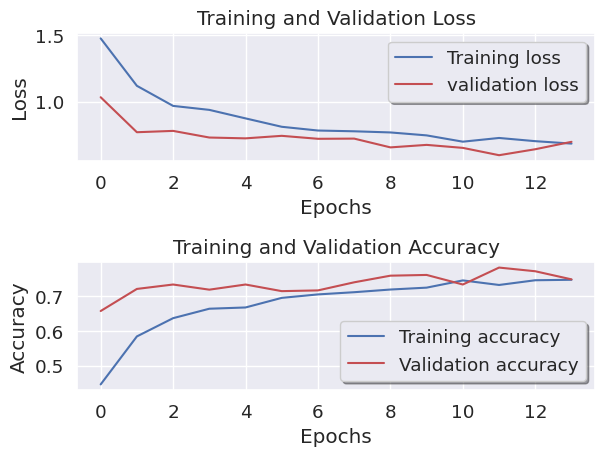

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/25_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.6577 - accuracy: 0.7703
 validation loss and accuracy are [0.6577110886573792, 0.7703062295913696]
0.6577110886573792 Test accuracy: 0.7703


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.683771        0.747727  0.697109      0.748936   0.657711   

   Test_Accuracy  
0       0.770306

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   
23    1.252455        0.511818  0.777699      0.710638   0.750540   
24    0.683771        0.747727  0.697109      0.748936   0.657711   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983  
23       0.731691  
24       0.770306

**#Iteration 12:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/26_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 136s 241ms/step - loss: 1.0531 - accuracy: 0.6055 - val_loss: 0.7665 - val_accuracy: 0.6723
Epoch 2/30
220/220 [==============================] - 52s 236ms/step - loss: 0.7553 - accuracy: 0.7200 - val_loss: 0.6446 - val_accuracy: 0.7447
Epoch 3/30
220/220 [==============================] - 52s 236ms/step - loss: 0.6474 - accuracy: 0.7700 - val_loss: 0.6283 - val_accuracy: 0.7723
Epoch 4/30
220/220 [==============================] - 47s 213ms/step - loss: 0.5555 - accuracy: 0.7950 - val_loss: 0.6164 - val_accuracy: 0.7574
Epoch 5/30
220/220 [==============================] - 46s 211ms/step - loss: 0.5088 - accuracy: 0.8109 - val_loss: 0.6799 - val_accuracy: 0.7532
Epoch 6/30
220/220 [==============================] - 47s 213ms/step - loss: 0.4651 - accuracy: 0.8200 - val_loss: 0.7366 - val_accuracy: 0.7234
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 14s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 20   7  12   0   1   5   0]
 [  3  48  14   0   1  16   0]
 [  2   2 124   0   5  16   0]
 [  0   2   4  10   0   2   0]
 [  1   4  32   1  49  53   1]
 [  1   9 141   0  25 867   0]
 [  0   0   0   0   0   0  24]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.74      0.44      0.56        45
         bcc       0.67      0.59      0.62        82
         bkl       0.38      0.83      0.52       149
          df       0.91      0.56      0.69        18
         mel       0.60      0.35      0.44       141
          nv       0.90      0.83      0.87      1043
        vasc       0.96      1.00      0.98        24

    accuracy                           0.76      1502
   macro avg       0.74      0.66      0.67      1502
weighted avg       0.81      0.76      0.77      1502



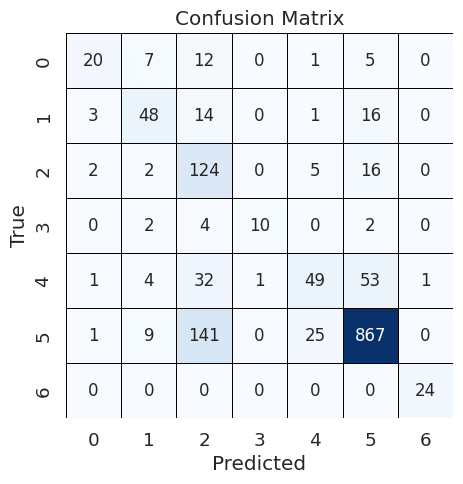

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

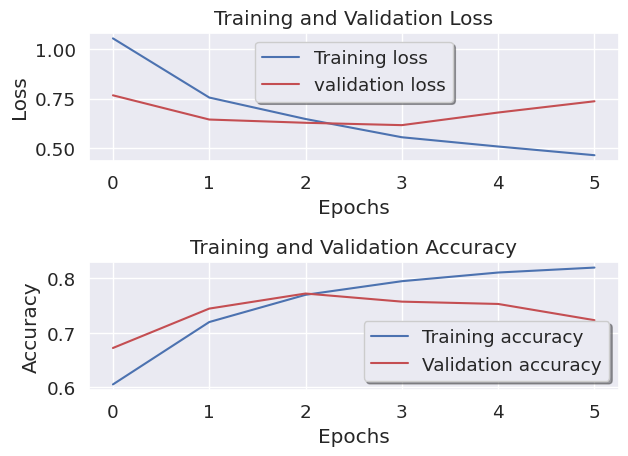

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/26_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 72ms/step - loss: 0.5907 - accuracy: 0.7929
 validation loss and accuracy are [0.5906787514686584, 0.7929427623748779]
0.5906787514686584 Test accuracy: 0.7929


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.46508            0.82  0.736565      0.723404   0.590679   

   Test_Accuracy  
0       0.792943

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   
23    1.252455        0.511818  0.777699      0.710638   0.750540   
24    0.683771        0.747727  0.697109      0.748936   0.657711   
25    0.465080        0.820000  0.736565      0.723404   0.590679   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983  
23       0.731691  
24       0.770306  
25       0.792943

**#Iteration 13:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/27_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 30s 94ms/step - loss: 1.3367 - accuracy: 0.5014 - val_loss: 1.0647 - val_accuracy: 0.5936
Epoch 2/30
220/220 [==============================] - 19s 85ms/step - loss: 1.0961 - accuracy: 0.5700 - val_loss: 0.8836 - val_accuracy: 0.6979
Epoch 3/30
220/220 [==============================] - 18s 84ms/step - loss: 1.0790 - accuracy: 0.5927 - val_loss: 0.8414 - val_accuracy: 0.7000
Epoch 4/30
220/220 [==============================] - 16s 72ms/step - loss: 1.0334 - accuracy: 0.6014 - val_loss: 0.8612 - val_accuracy: 0.6809
Epoch 5/30
220/220 [==============================] - 18s 84ms/step - loss: 1.0045 - accuracy: 0.6191 - val_loss: 0.8157 - val_accuracy: 0.7021
Epoch 6/30
220/220 [==============================] - 19s 85ms/step - loss: 0.9852 - accuracy: 0.6301 - val_loss: 0.8017 - val_accuracy: 0.7447
Epoch 7/30
220/220 [==============================] - 16s 73ms/step - loss: 0.9609 - accuracy: 0.6295 - val_loss: 1.0225 - val_accuracy:

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 18s 71ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  4  17   6   2   3  13   0]
 [  1  41  10   1   2  24   3]
 [  2  11  45   5  13  72   1]
 [  0   2   2   4   0  10   0]
 [  1  10  17   2  36  73   2]
 [  1   9  25   8  27 972   1]
 [  0   0   0   0   0   5  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.44      0.09      0.15        45
         bcc       0.46      0.50      0.48        82
         bkl       0.43      0.30      0.35       149
          df       0.18      0.22      0.20        18
         mel       0.44      0.26      0.32       141
          nv       0.83      0.93      0.88      1043
        vasc       0.73      0.79      0.76        24

    accuracy                           0.75      1502
   macro avg       0.50      0.44      0.45      1502
weighted avg       0.71      0.75      0.72      1502



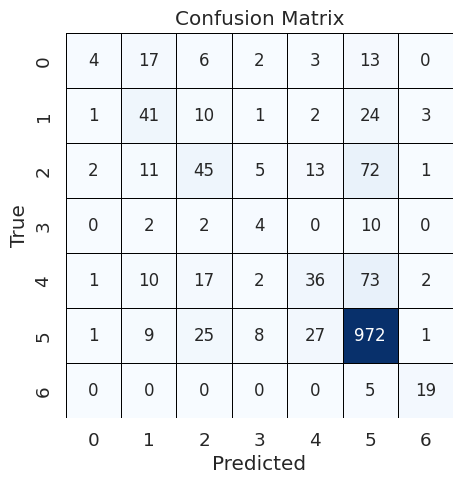

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

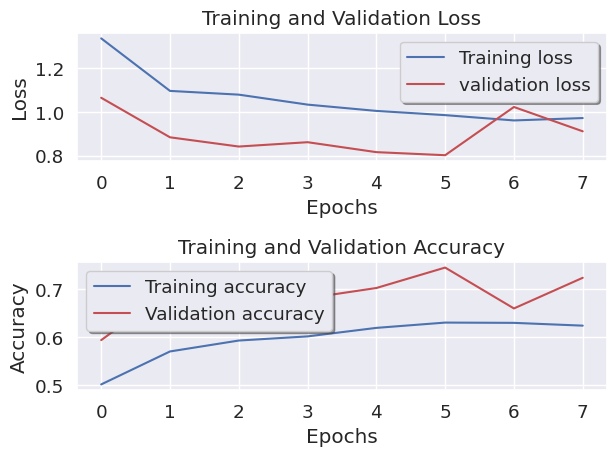

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/27_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 71ms/step - loss: 0.7668 - accuracy: 0.7463
 validation loss and accuracy are [0.7667638659477234, 0.7463381886482239]
0.7667638659477234 Test accuracy: 0.7463


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    0.971777        0.623749  0.911076      0.723404   0.766764   

   Test_Accuracy  
0       0.746338

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   
23    1.252455        0.511818  0.777699      0.710638   0.750540   
24    0.683771        0.747727  0.697109      0.748936   0.657711   
25    0.465080        0.820000  0.736565      0.723404   0.590679   
26    0.971777        0.623749  0.911076      0.723404   0.766764   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983  
23       0.731691  
24       0.770306  
25       0.792943  
26       0.746338

**#Iteration 14:**

In [ ]:
##############################################################################################################

In [ ]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(224, activation='relu'))
densenet_model.add(Dropout(0.3))
densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

densenet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/28_best_model_DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=densenet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
220/220 [==============================] - 31s 96ms/step - loss: 1.6150 - accuracy: 0.3964 - val_loss: 1.1080 - val_accuracy: 0.5809
Epoch 2/30
220/220 [==============================] - 19s 87ms/step - loss: 1.3716 - accuracy: 0.4595 - val_loss: 0.9172 - val_accuracy: 0.6872
Epoch 3/30
220/220 [==============================] - 19s 85ms/step - loss: 1.2903 - accuracy: 0.4945 - val_loss: 0.8304 - val_accuracy: 0.7021
Epoch 4/30
220/220 [==============================] - 19s 84ms/step - loss: 1.3345 - accuracy: 0.4736 - val_loss: 0.8910 - val_accuracy: 0.7085
Epoch 5/30
220/220 [==============================] - 17s 75ms/step - loss: 1.2858 - accuracy: 0.4895 - val_loss: 0.8371 - val_accuracy: 0.6830
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 13s 70ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  0  26  11   4   0   4   0]
 [  0  54  12   0   1  12   3]
 [  1  42  38   8  11  49   0]
 [  0   4   3   1   1   7   2]
 [  0  20  24   6  27  63   1]
 [  0  45  51   9  52 877   9]
 [  0   0   1   0   0   4  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        45
         bcc       0.28      0.66      0.40        82
         bkl       0.27      0.26      0.26       149
          df       0.04      0.06      0.04        18
         mel       0.29      0.19      0.23       141
          nv       0.86      0.84      0.85      1043
        vasc       0.56      0.79      0.66        24

    accuracy                           0.68      1502
   macro avg       0.33      0.40      0.35      1502
weighted avg       0.68      0.68      0.67      1502



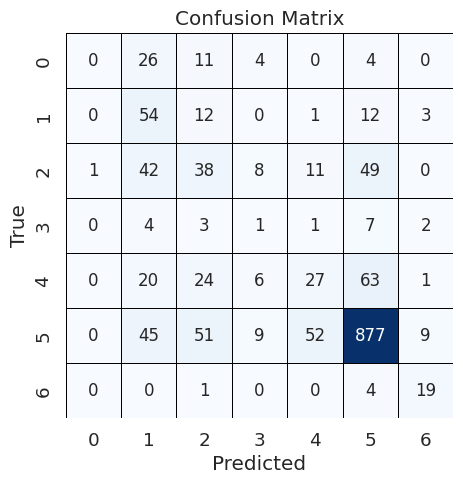

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

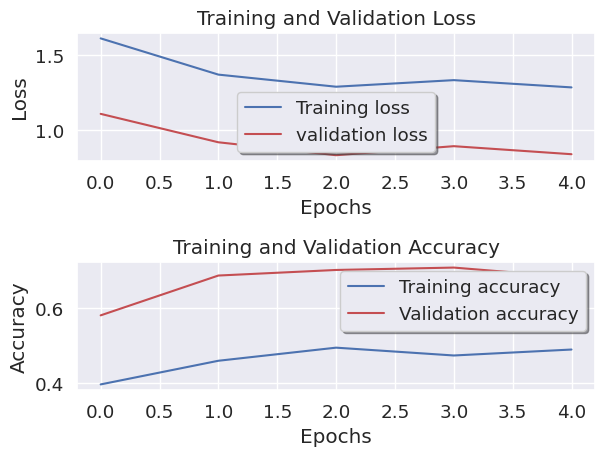

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
densenet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/28_best_model_DENSENET201.h5')
results = densenet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = densenet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 11s 71ms/step - loss: 0.8857 - accuracy: 0.7224
 validation loss and accuracy are [0.8857308626174927, 0.7223701477050781]
0.8857308626174927 Test accuracy: 0.7224


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0    1.285756        0.489545  0.837058      0.682979   0.885731   

   Test_Accuracy  
0        0.72237

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

Train_Loss  Train_Accuracy  Val_Loss  Val_Accuracy  Test_Loss  \
0     0.474564        0.825963  0.587688      0.788423   0.568681   
1     0.646130        0.759486  0.636813      0.760479   0.689858   
2     0.697856        0.730023  0.631864      0.769128   0.611656   
3     0.534129        0.795007  0.620574      0.777778   0.620233   
4     0.412160        0.844936  0.590820      0.808383   0.588281   
5     0.914584        0.673467  0.753968      0.728543   0.756556   
6     1.177999        0.540656  1.094146      0.611444   0.869369   
7     0.652098        0.764194  0.724003      0.756487   0.690832   
8     0.640718        0.753780  0.732685      0.751830   0.600180   
9     1.060283        0.581027  0.718663      0.732535   0.718844   
10    0.673079        0.747646  0.653904      0.754491   0.666882   
11    0.269770        0.904823  0.578210      0.810379   0.546915   
12    0.920106        0.658773  0.824551      0.727212   0.779672   
13    1.186820        0.553352  0.803573      0.704591   0.796025   
14    0.732282        0.740000  0.854749      0.742553   0.825098   
15    0.843679        0.685000  0.786848      0.708511   0.711836   
16    1.113499        0.572338  0.723566      0.727660   0.784070   
17    0.749038        0.715000  0.782182      0.727660   0.695333   
18    0.500163        0.820455  0.563024      0.789362   0.568761   
19    0.967235        0.645000  0.845414      0.687234   0.845940   
20    1.372283        0.464091  0.840280      0.687234   0.883866   
21    0.630540        0.765455  0.655360      0.759574   0.621139   
22    0.818892        0.683636  0.674507      0.765957   0.718712   
23    1.252455        0.511818  0.777699      0.710638   0.750540   
24    0.683771        0.747727  0.697109      0.748936   0.657711   
25    0.465080        0.820000  0.736565      0.723404   0.590679   
26    0.971777        0.623749  0.911076      0.723404   0.766764   
27    1.285756        0.489545  0.837058      0.682979   0.885731   

    Test_Accuracy  
0        0.791611  
1        0.762983  
2        0.771638  
3        0.770972  
4        0.811585  
5        0.741678  
6        0.714381  
7        0.759654  
8        0.772969  
9        0.750333  
10       0.757656  
11       0.813582  
12       0.727031  
13       0.729694  
14       0.757656  
15       0.754993  
16       0.715047  
17       0.752996  
18       0.778296  
19       0.713049  
20       0.701731  
21       0.766312  
22       0.762983  
23       0.731691  
24       0.770306  
25       0.792943  
26       0.746338  
27       0.722370

In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-07 00:19:44 GMT


In [ ]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
#END OF CHANGE  IN BATCH SIZE
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################